In [66]:
%matplotlib notebook

In [2]:
import os, sys
sys.path.append(os.path.abspath('../../main/python'))

In [54]:
import collections as col

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from thalesians.tsa.distrs import NormalDistr as N
import thalesians.tsa.evaluation as evaluation
import thalesians.tsa.filtering as filtering
import thalesians.tsa.filtering.kalman as kalman
import thalesians.tsa.filtering.visual as visual
import thalesians.tsa.numpyutils as npu
import thalesians.tsa.optimisation as optimisation
import thalesians.tsa.optimisation.visual as optvisual
import thalesians.tsa.processes as proc
import thalesians.tsa.random as rnd
import thalesians.tsa.simulation as sim

import importlib
importlib.reload(optvisual)
importlib.reload(npu)
importlib.reload(optimisation)
importlib.reload(filtering)

<module 'thalesians.tsa.filtering' from 'S:\\dev\\tsa\\src\\main\\python\\thalesians\\tsa\\filtering\\__init__.py'>

In [4]:
npu.init_warnings()

In [5]:
rnd.random_state(np.random.RandomState(seed=42), force=True);

In [63]:
X = proc.OrnsteinUhlenbeckProcess.create_multiscale_from_vol(transition_vector=[10., 20.], mean=15., vol=[[10., .0], [.0, 3.]])

In [64]:
X.transition

array([[ 10.,   0.],
       [-20.,  20.]])

<IPython.core.display.Javascript object>


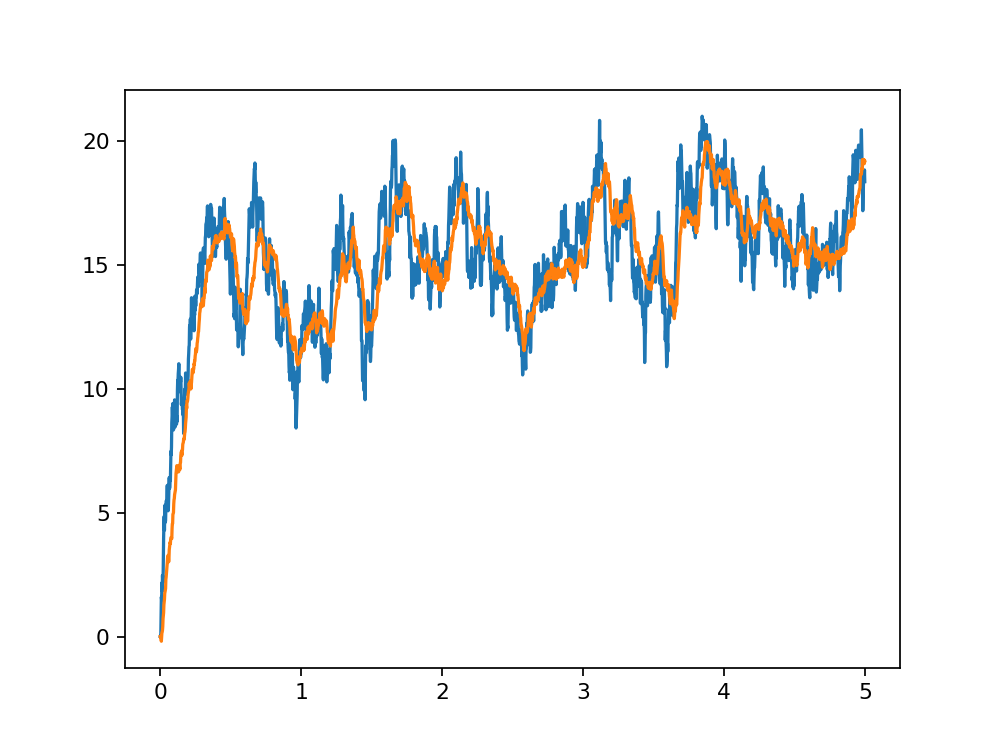

In [67]:
em = sim.EulerMaruyama(process=X, times=sim.xtimes(start=0., stop=5., step=.002))
df = sim.run(em)
plt.plot(df);

In [68]:
filtr = filtering.kalman.KalmanFilter(time=df.index[0], state_distr=N(mean=npu.col(0., 0.), cov=1000. * np.eye(2)), process=X)
state_observable = filtr.create_identity_observable(X)
first_observable = filtr.create_observable(kalman.KalmanFilterObsModel.create([[1., 0.]]), X)
last_observable = filtr.create_observable(kalman.KalmanFilterObsModel.create([[0., 1.]]), X)

In [69]:
run_df = filtering.run(observable=last_observable, obss=1, df=df, return_df=True)

In [70]:
run_df.df

time                 filter_name  \
0     0.000  KalmanFilter_2814142369520   
1     0.000  KalmanFilter_2814142369520   
2     0.002  KalmanFilter_2814142369520   
3     0.004  KalmanFilter_2814142369520   
4     0.006  KalmanFilter_2814142369520   
5     0.008  KalmanFilter_2814142369520   
6     0.010  KalmanFilter_2814142369520   
7     0.012  KalmanFilter_2814142369520   
8     0.014  KalmanFilter_2814142369520   
9     0.016  KalmanFilter_2814142369520   
10    0.018  KalmanFilter_2814142369520   
11    0.020  KalmanFilter_2814142369520   
12    0.022  KalmanFilter_2814142369520   
13    0.024  KalmanFilter_2814142369520   
14    0.026  KalmanFilter_2814142369520   
15    0.028  KalmanFilter_2814142369520   
16    0.030  KalmanFilter_2814142369520   
17    0.032  KalmanFilter_2814142369520   
18    0.034  KalmanFilter_2814142369520   
19    0.036  KalmanFilter_2814142369520   
20    0.038  KalmanFilter_2814142369520   
21    0.040  KalmanFilter_2814142369520   
22    0.042  KalmanFilter_2814142369520   
23    0.044  KalmanFilter_2814142369520   
24    0.046  KalmanFilter_2814142369520   
25    0.048  KalmanFilter_2814142369520   
26    0.050  KalmanFilter_2814142369520   
27    0.052  KalmanFilter_2814142369520   
28    0.054  KalmanFilter_2814142369520   
29    0.056  KalmanFilter_2814142369520   
...     ...                         ...   
2472  4.942  KalmanFilter_2814142369520   
2473  4.944  KalmanFilter_2814142369520   
2474  4.946  KalmanFilter_2814142369520   
2475  4.948  KalmanFilter_2814142369520   
2476  4.950  KalmanFilter_2814142369520   
2477  4.952  KalmanFilter_2814142369520   
2478  4.954  KalmanFilter_2814142369520   
2479  4.956  KalmanFilter_2814142369520   
2480  4.958  KalmanFilter_2814142369520   
2481  4.960  KalmanFilter_2814142369520   
2482  4.962  KalmanFilter_2814142369520   
2483  4.964  KalmanFilter_2814142369520   
2484  4.966  KalmanFilter_2814142369520   
2485  4.968  KalmanFilter_2814142369520   
2486  4.970  KalmanFilter_2814142369520   
2487  4.972  KalmanFilter_2814142369520   
2488  4.974  KalmanFilter_2814142369520   
2489  4.976  KalmanFilter_2814142369520   
2490  4.978  KalmanFilter_2814142369520   
2491  4.980  KalmanFilter_2814142369520   
2492  4.982  KalmanFilter_2814142369520   
2493  4.984  KalmanFilter_2814142369520   
2494  4.986  KalmanFilter_2814142369520   
2495  4.988  KalmanFilter_2814142369520   
2496  4.990  KalmanFilter_2814142369520   
2497  4.992  KalmanFilter_2814142369520   
2498  4.994  KalmanFilter_2814142369520   
2499  4.996  KalmanFilter_2814142369520   
2500  4.998  KalmanFilter_2814142369520   
2501  5.000  KalmanFilter_2814142369520   

                                            filter_type  \
0     <class 'thalesians.tsa.filtering.kalman.Kalman...   
1     <class 'thalesians.tsa.filtering.kalman.Kalman...   
2     <class 'thalesians.tsa.filtering.kalman.Kalman...   
3     <class 'thalesians.tsa.filtering.kalman.Kalman...   
4     <class 'thalesians.tsa.filtering.kalman.Kalman...   
5     <class 'thalesians.tsa.filtering.kalman.Kalman...   
6     <class 'thalesians.tsa.filtering.kalman.Kalman...   
7     <class 'thalesians.tsa.filtering.kalman.Kalman...   
8     <class 'thalesians.tsa.filtering.kalman.Kalman...   
9     <class 'thalesians.tsa.filtering.kalman.Kalman...   
10    <class 'thalesians.tsa.filtering.kalman.Kalman...   
11    <class 'thalesians.tsa.filtering.kalman.Kalman...   
12    <class 'thalesians.tsa.filtering.kalman.Kalman...   
13    <class 'thalesians.tsa.filtering.kalman.Kalman...   
14    <class 'thalesians.tsa.filtering.kalman.Kalman...   
15    <class 'thalesians.tsa.filtering.kalman.Kalman...   
16    <class 'thalesians.tsa.filtering.kalman.Kalman...   
17    <class 'thalesians.tsa.filtering.kalman.Kalman...   
18    <class 'thalesians.tsa.filtering.kalman.Kalman...   
19    <class 'thalesians.tsa.filtering.kalman.Kalman...   
20    <class 'thalesians.tsa.filtering.kalman.Kalman...   
21    <class 'thalesians.tsa.filtering.kal

<IPython.core.display.Javascript object>


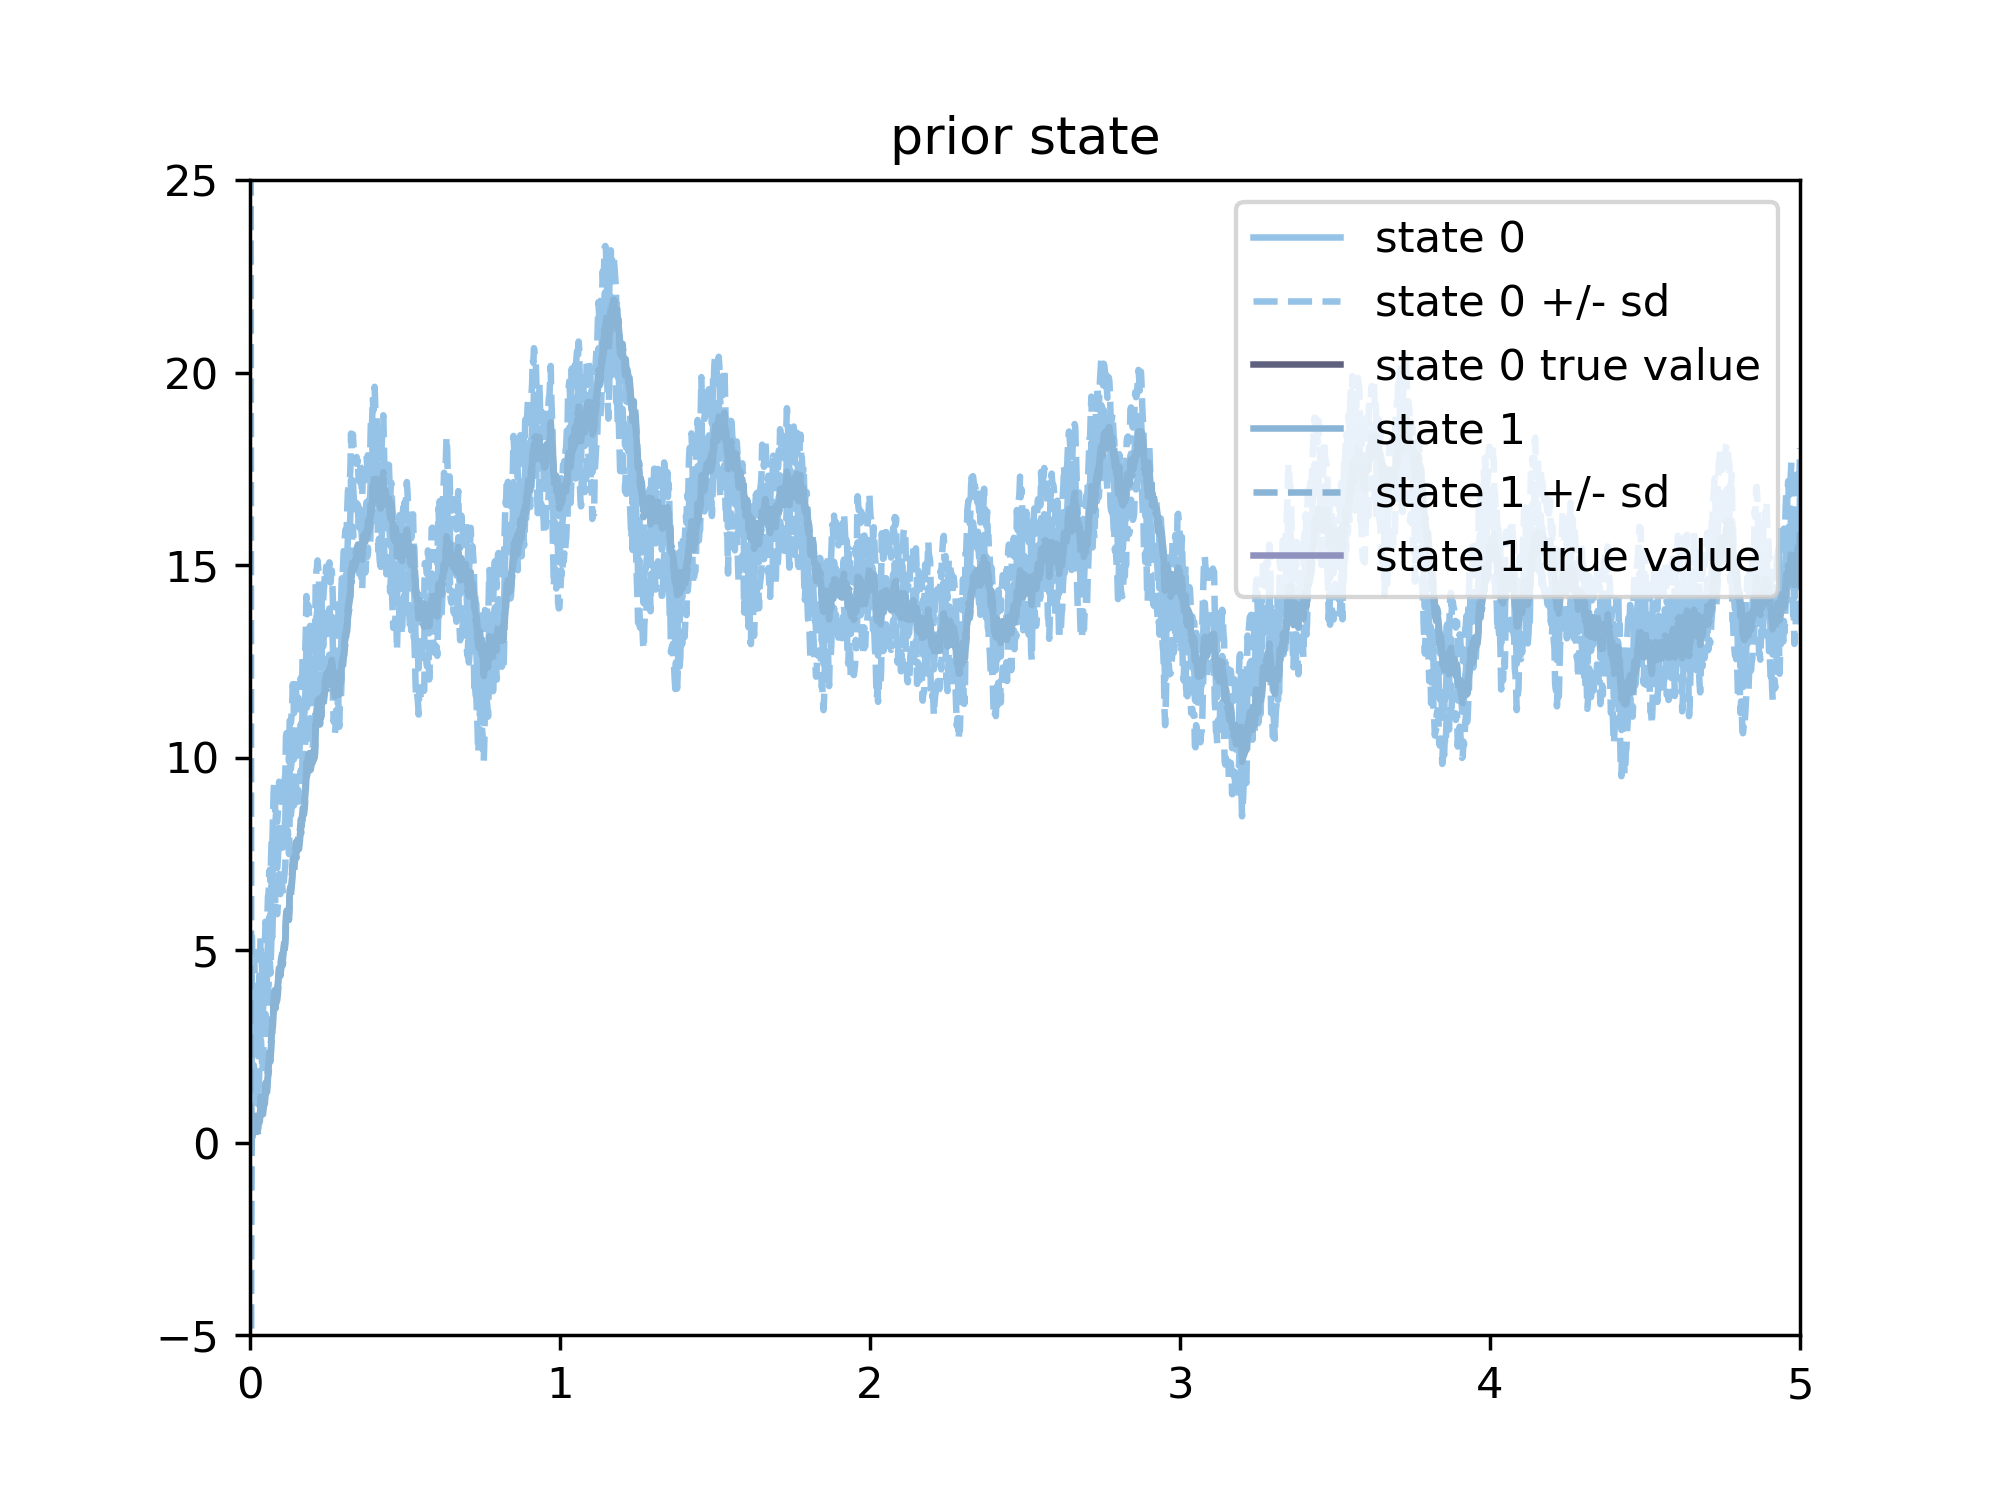

In [14]:
sp = visual.StatePlot(plot_obs_results=False)
sp.process_run_df(run_df.df)
sp.ax.set_ylim((-5, 25));

<IPython.core.display.Javascript object>


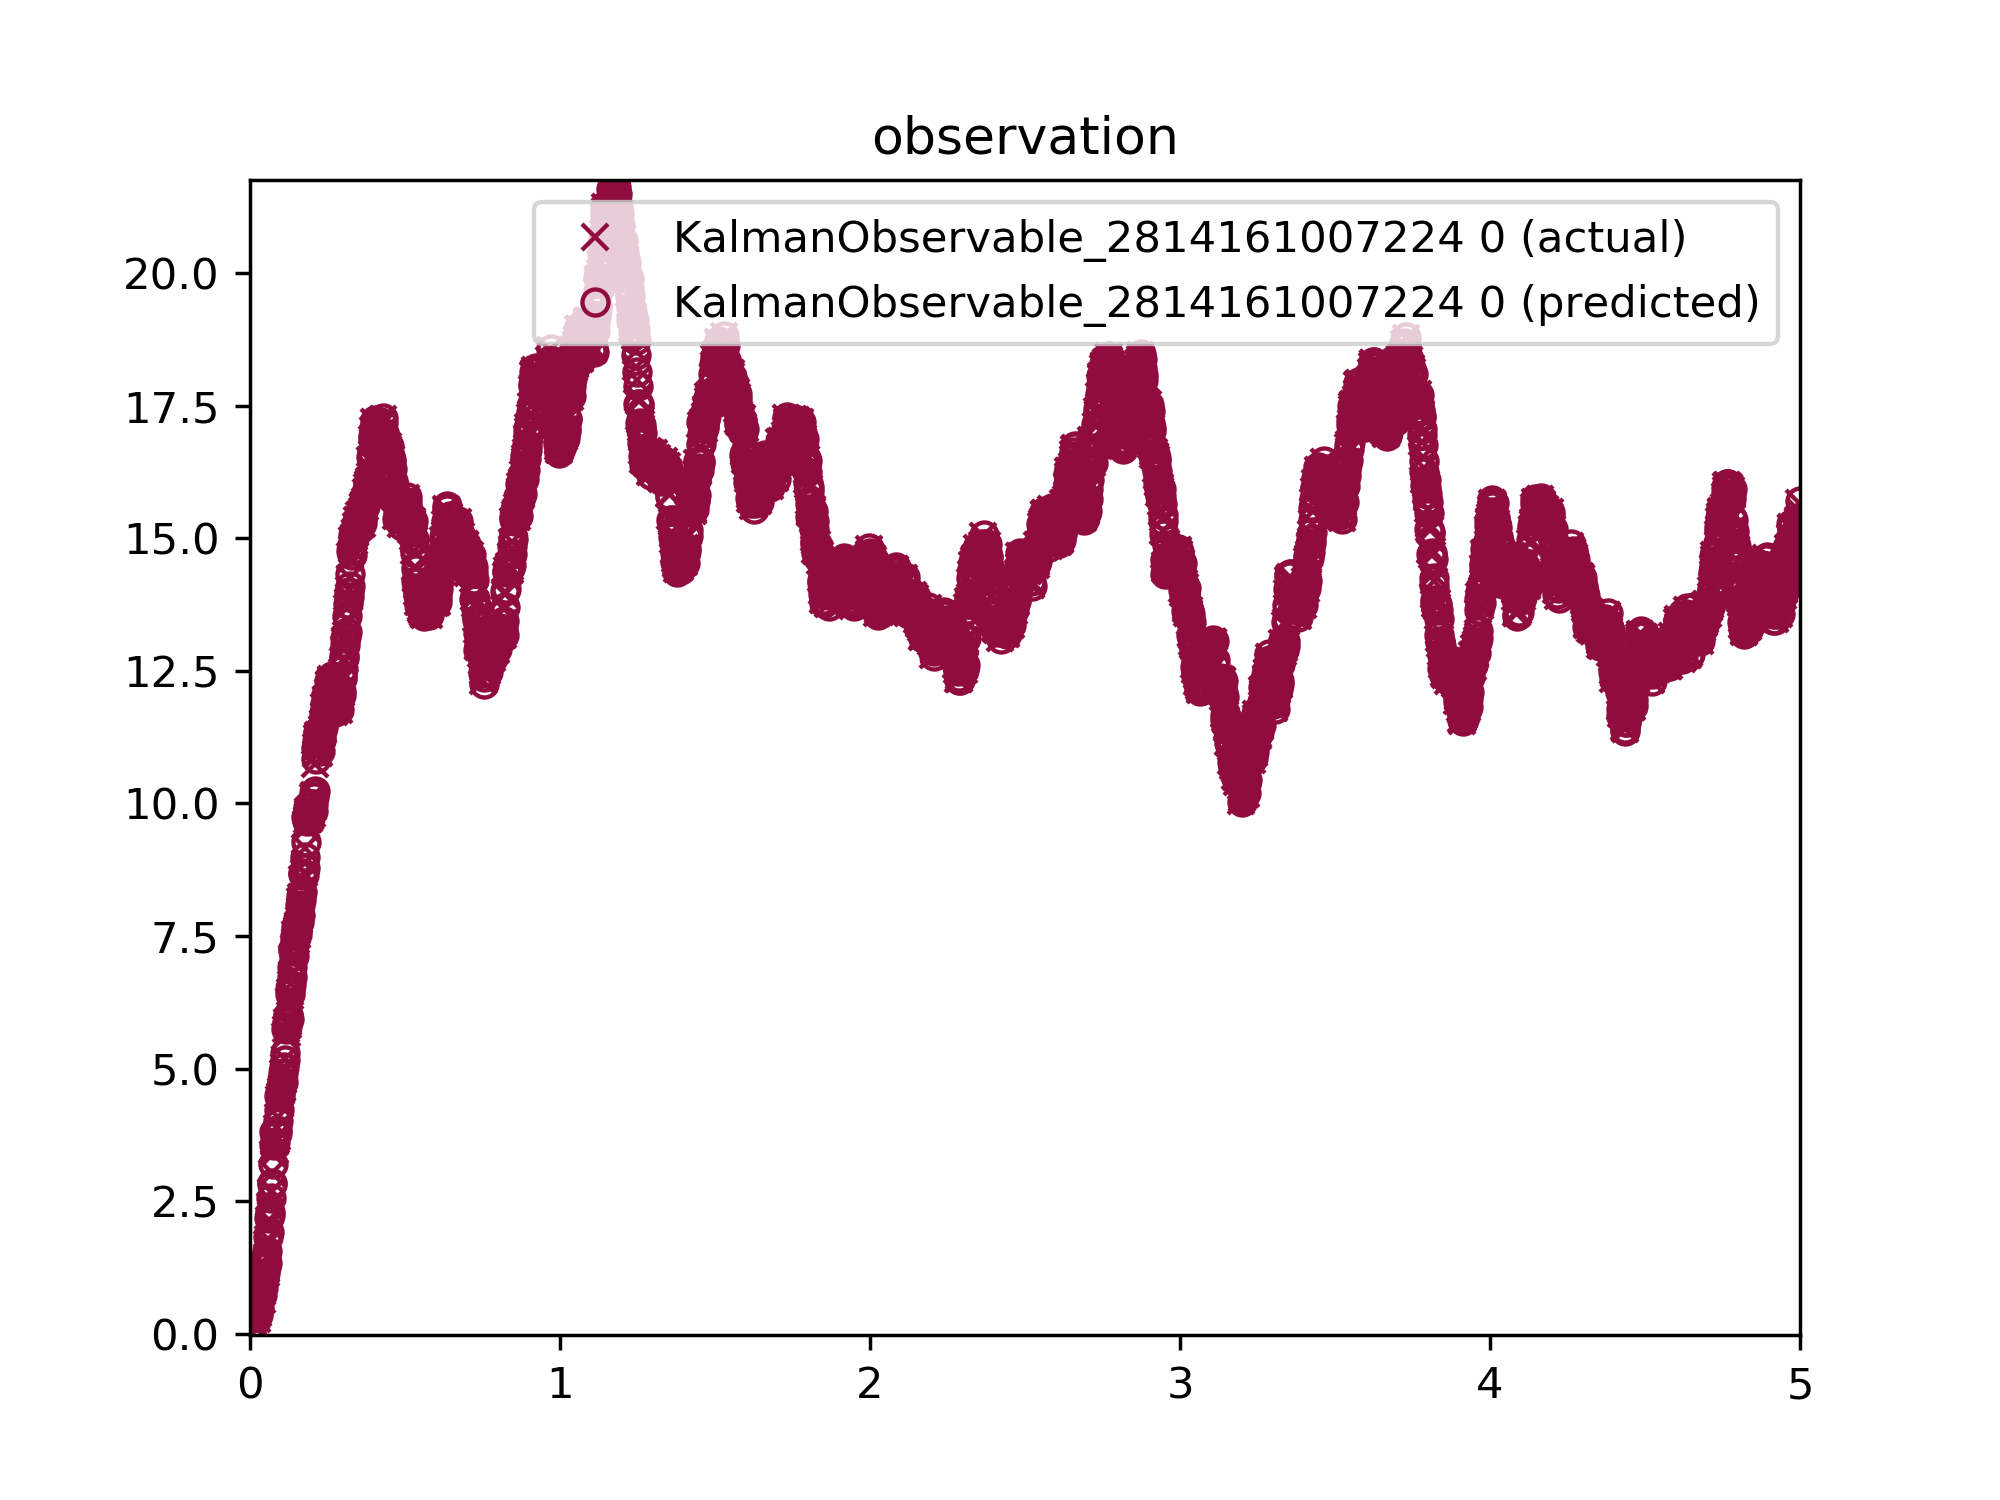

In [15]:
op = visual.ObsPlot();
op.process_run_df(run_df.df[1:])

<IPython.core.display.Javascript object>


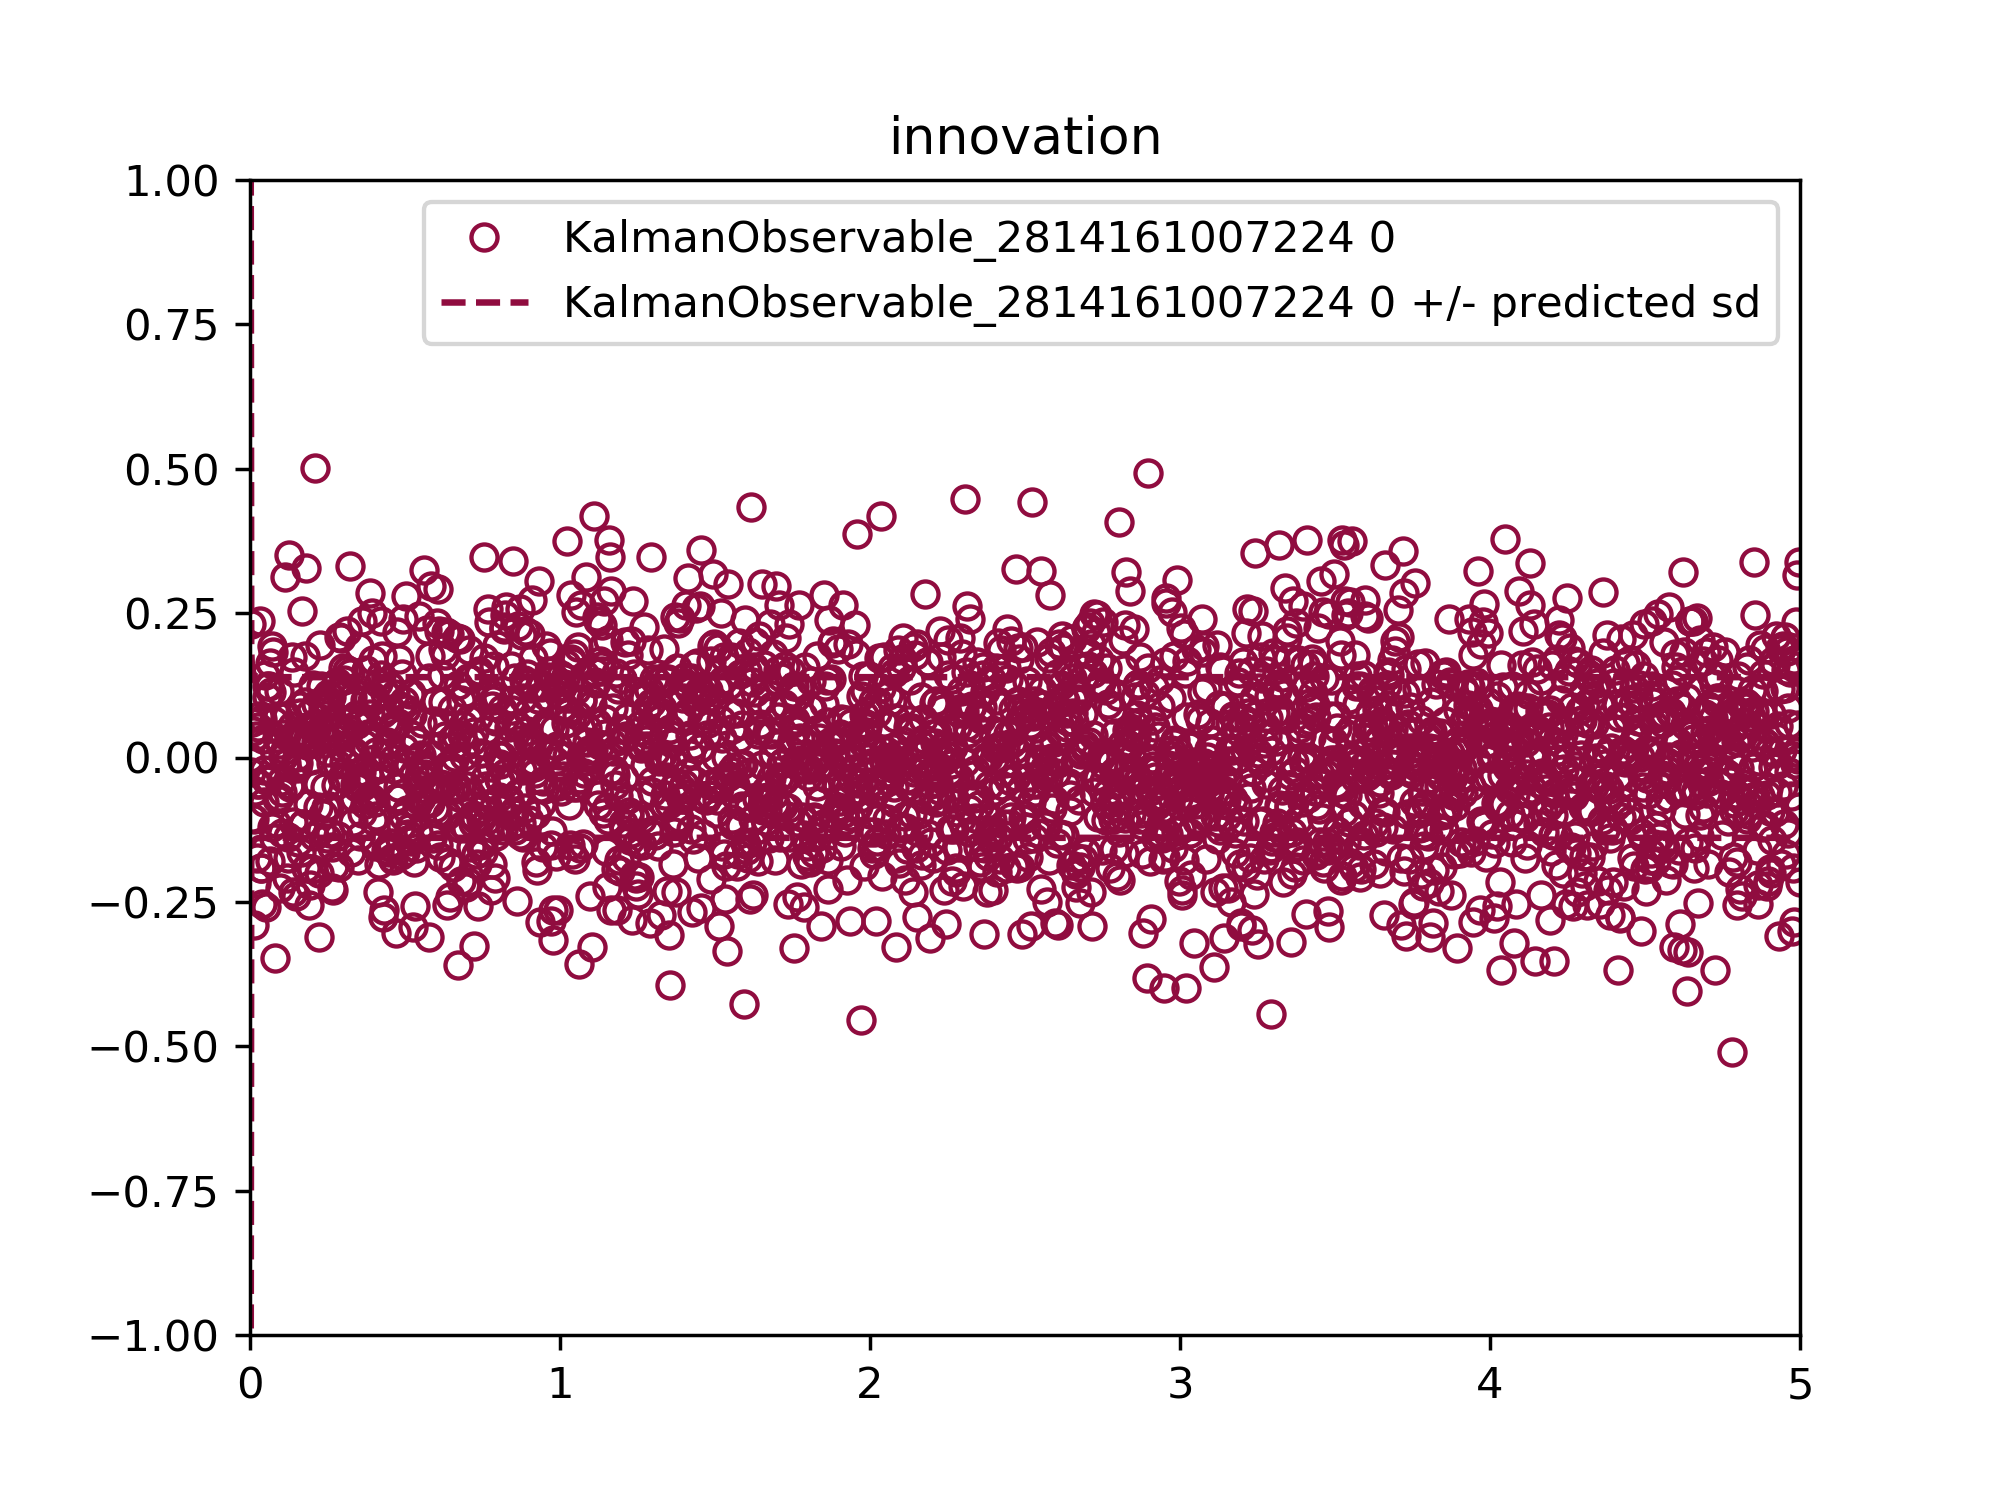

In [16]:
ep = visual.InnovPlot()
ep.process_run_df(run_df.df[1:])
ep.ax.set_ylim((-1, 1));

<IPython.core.display.Javascript object>


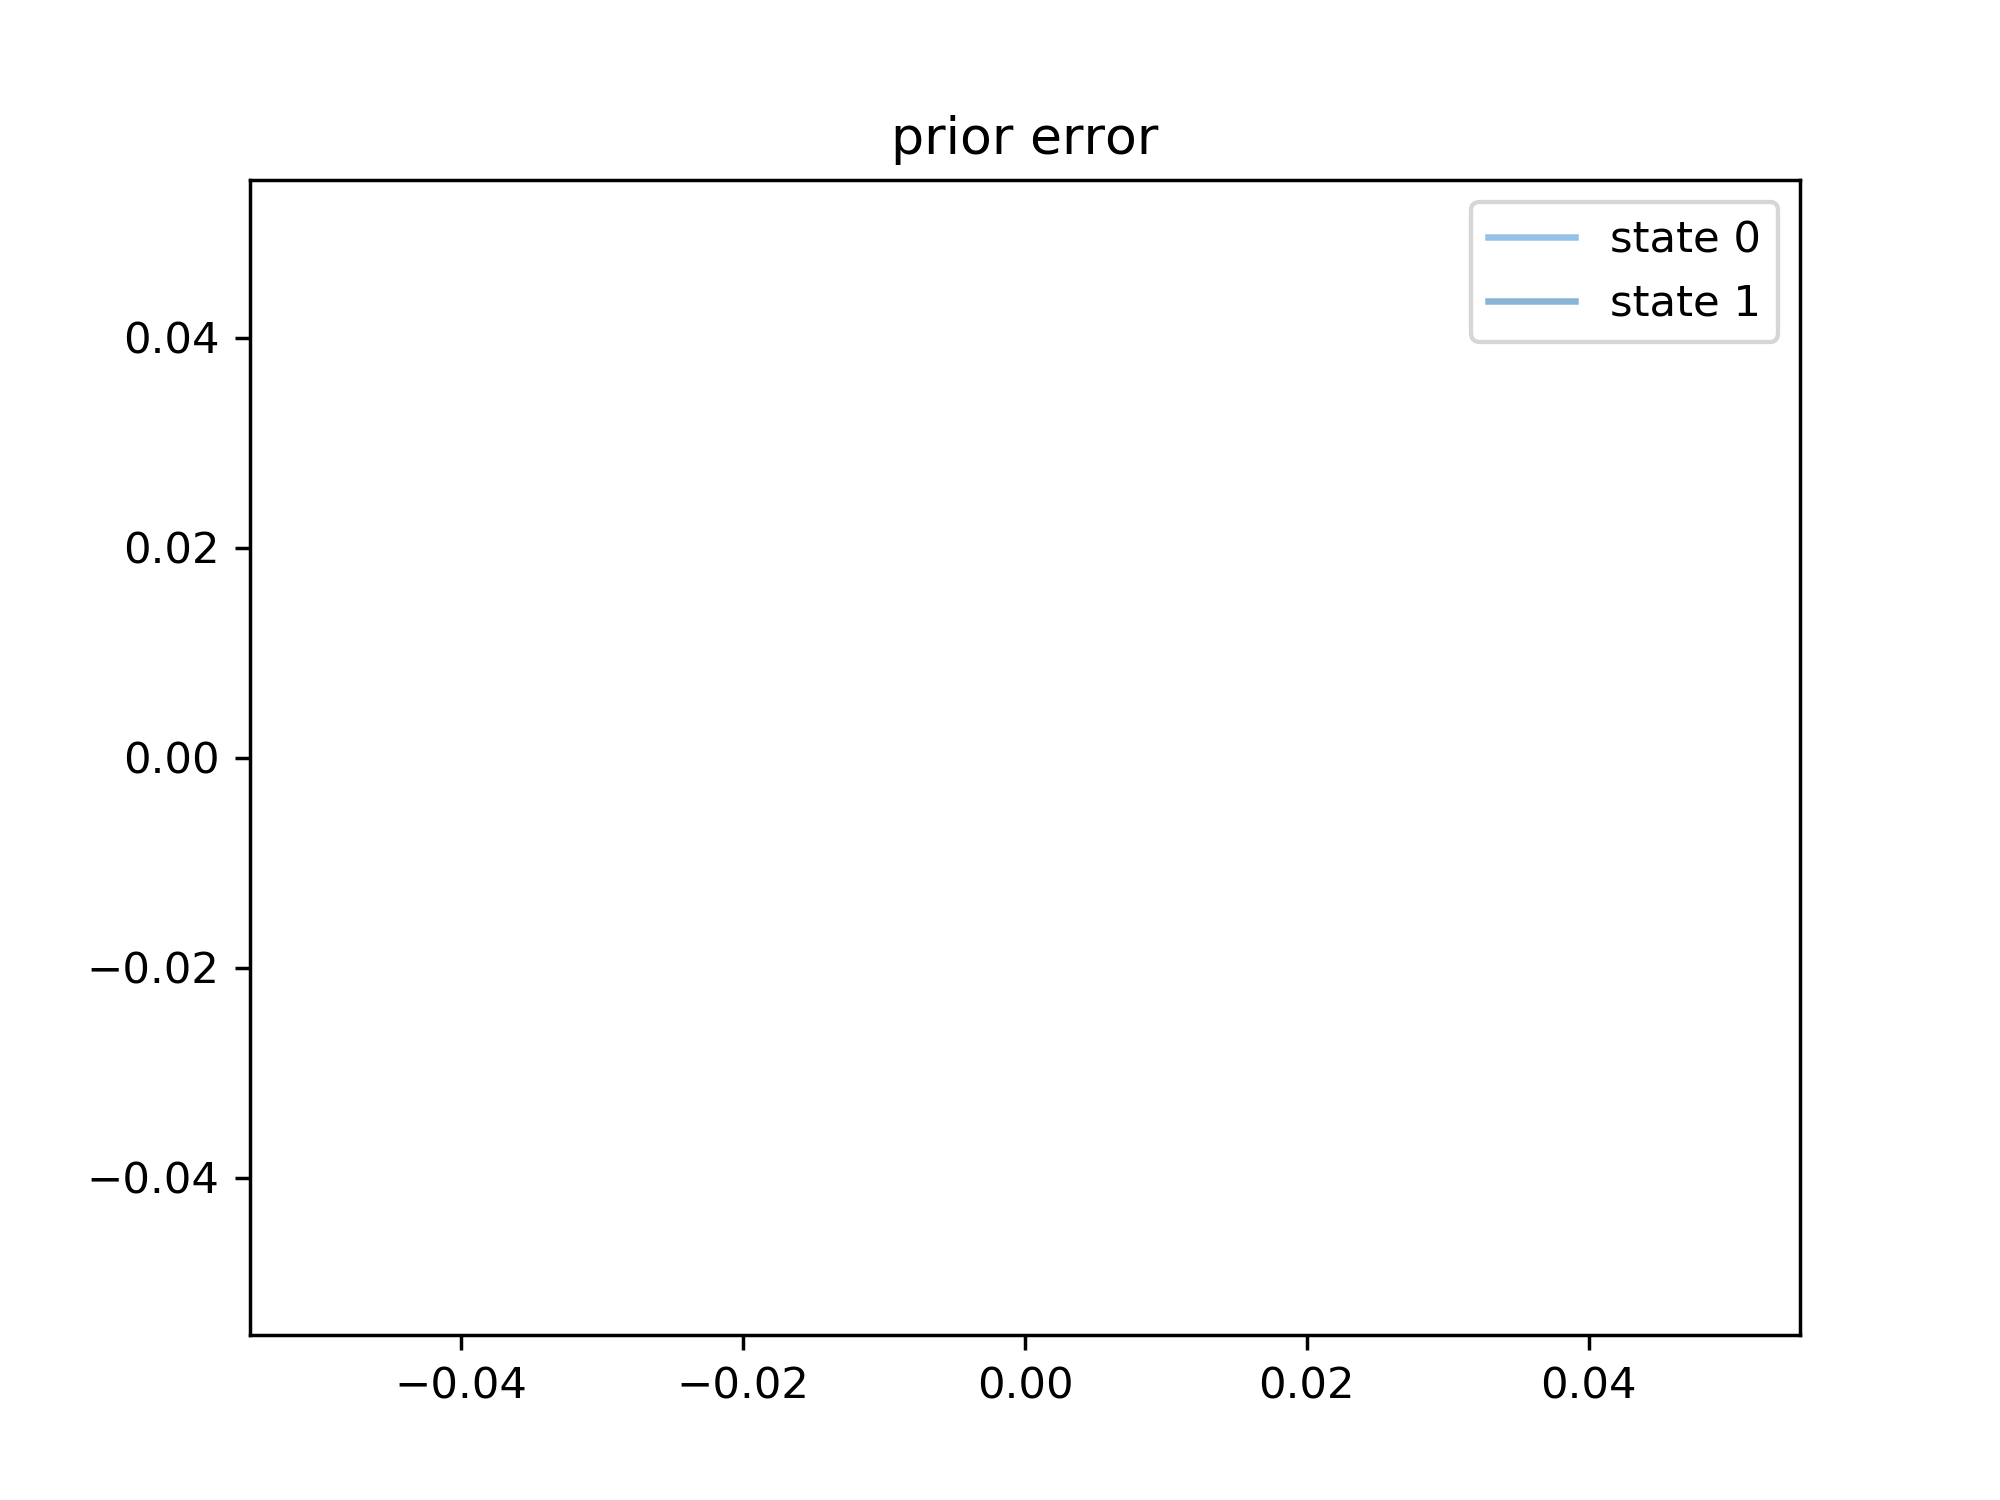

In [19]:
llp = visual.ErrorPlot();
llp.process_run_df(run_df.df[1:])

<IPython.core.display.Javascript object>


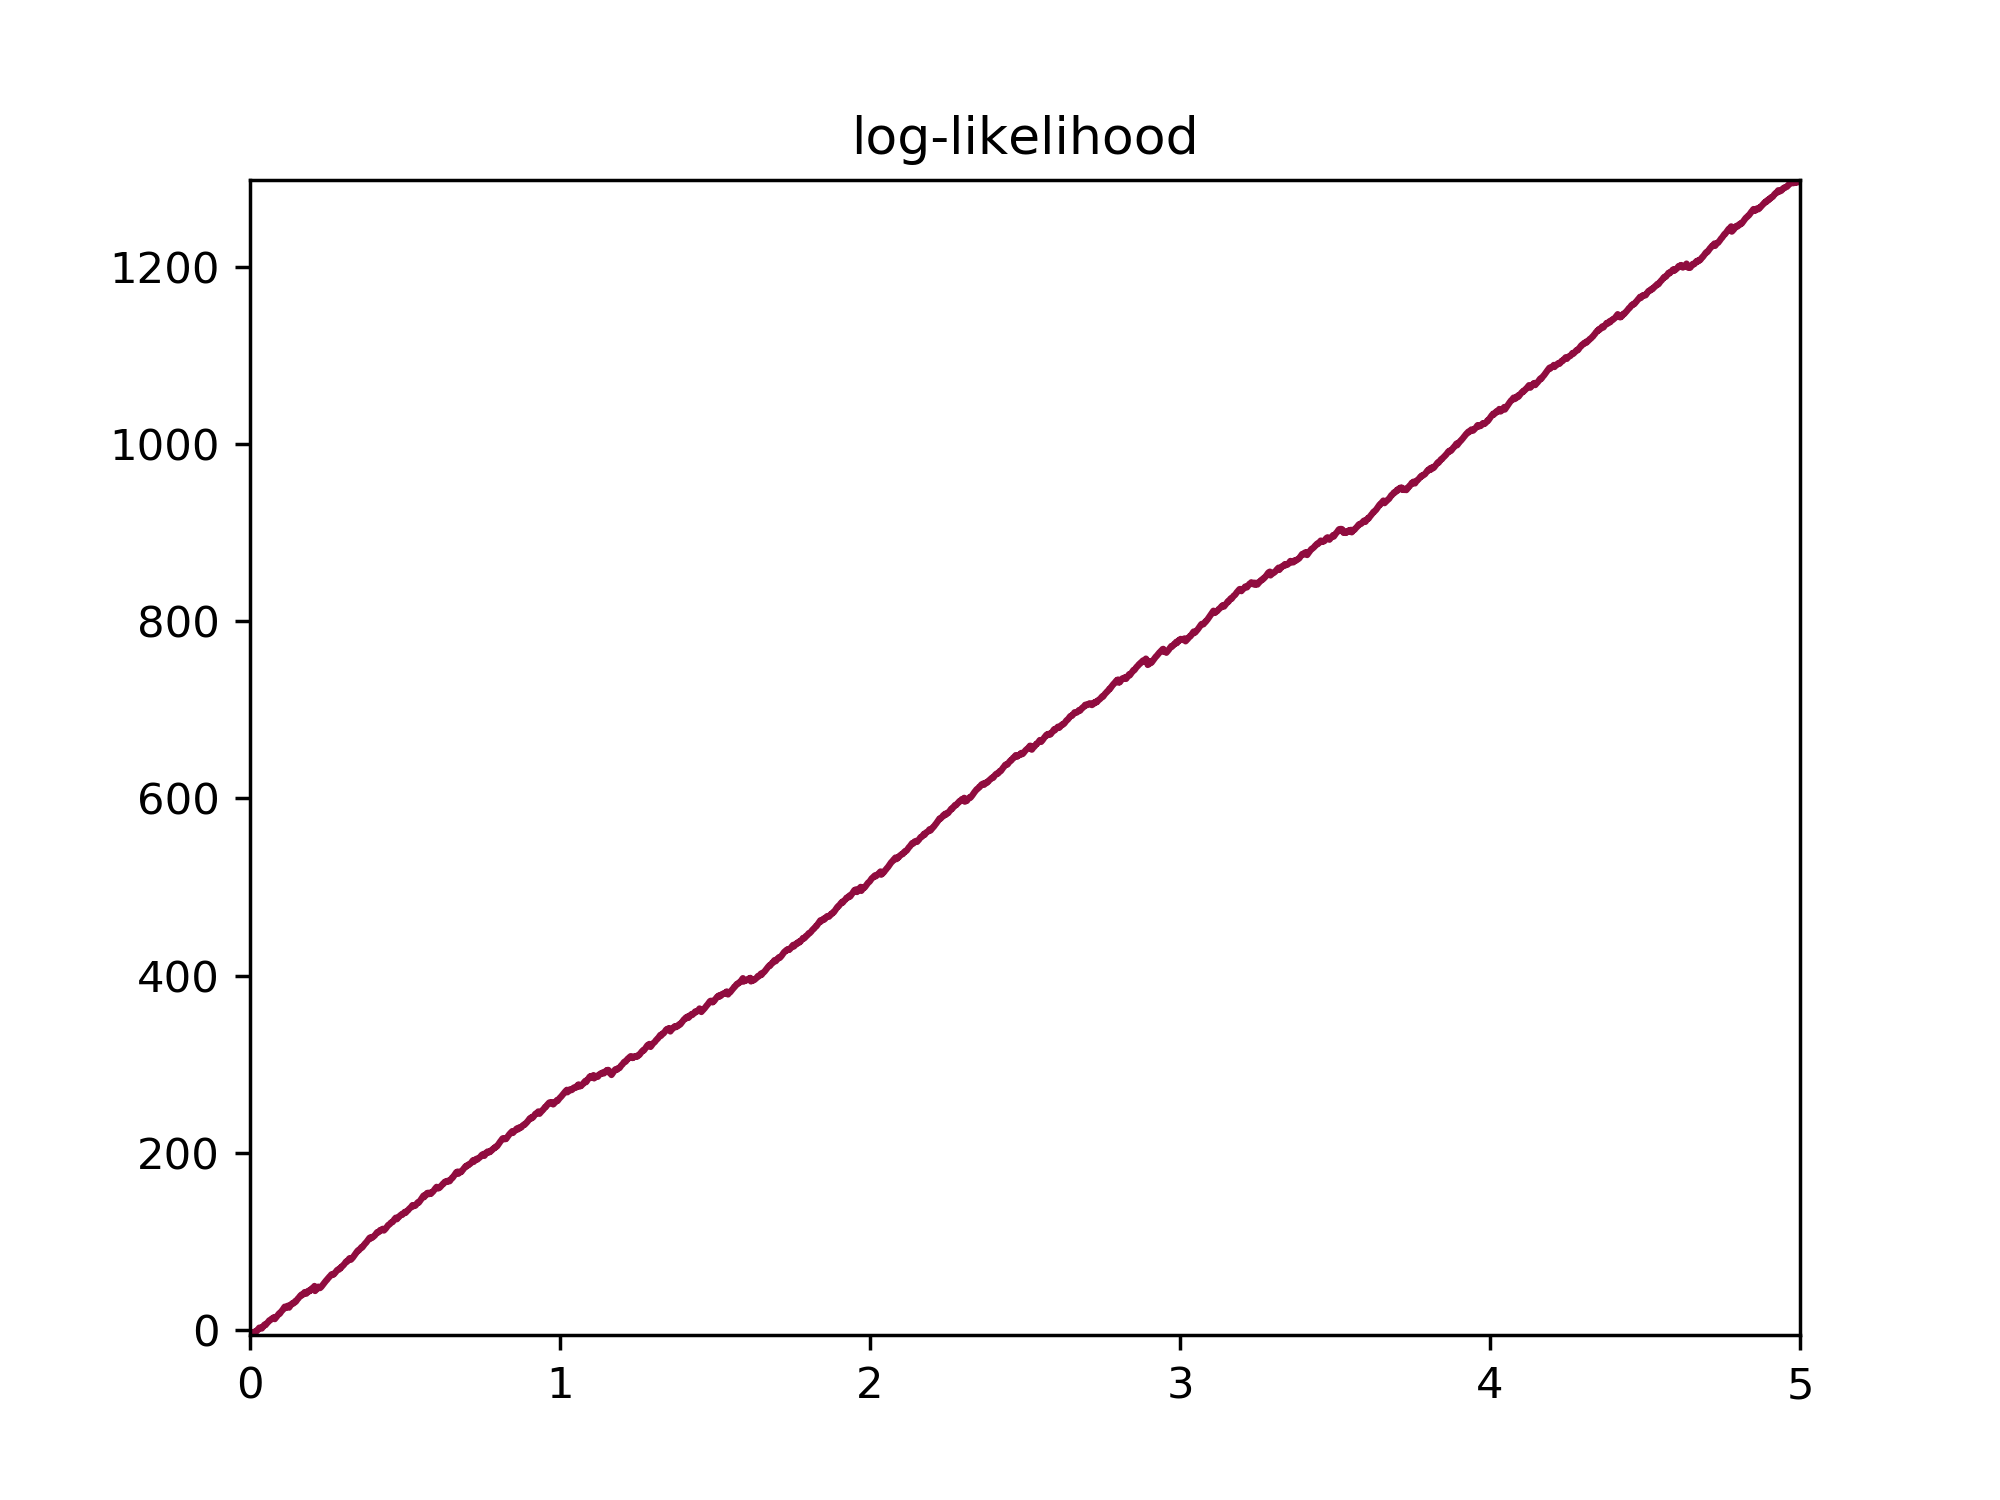

In [18]:
llp = visual.LogLikelihoodPlot(cumulative=True);
llp.process_run_df(run_df.df)

<IPython.core.display.Javascript object>


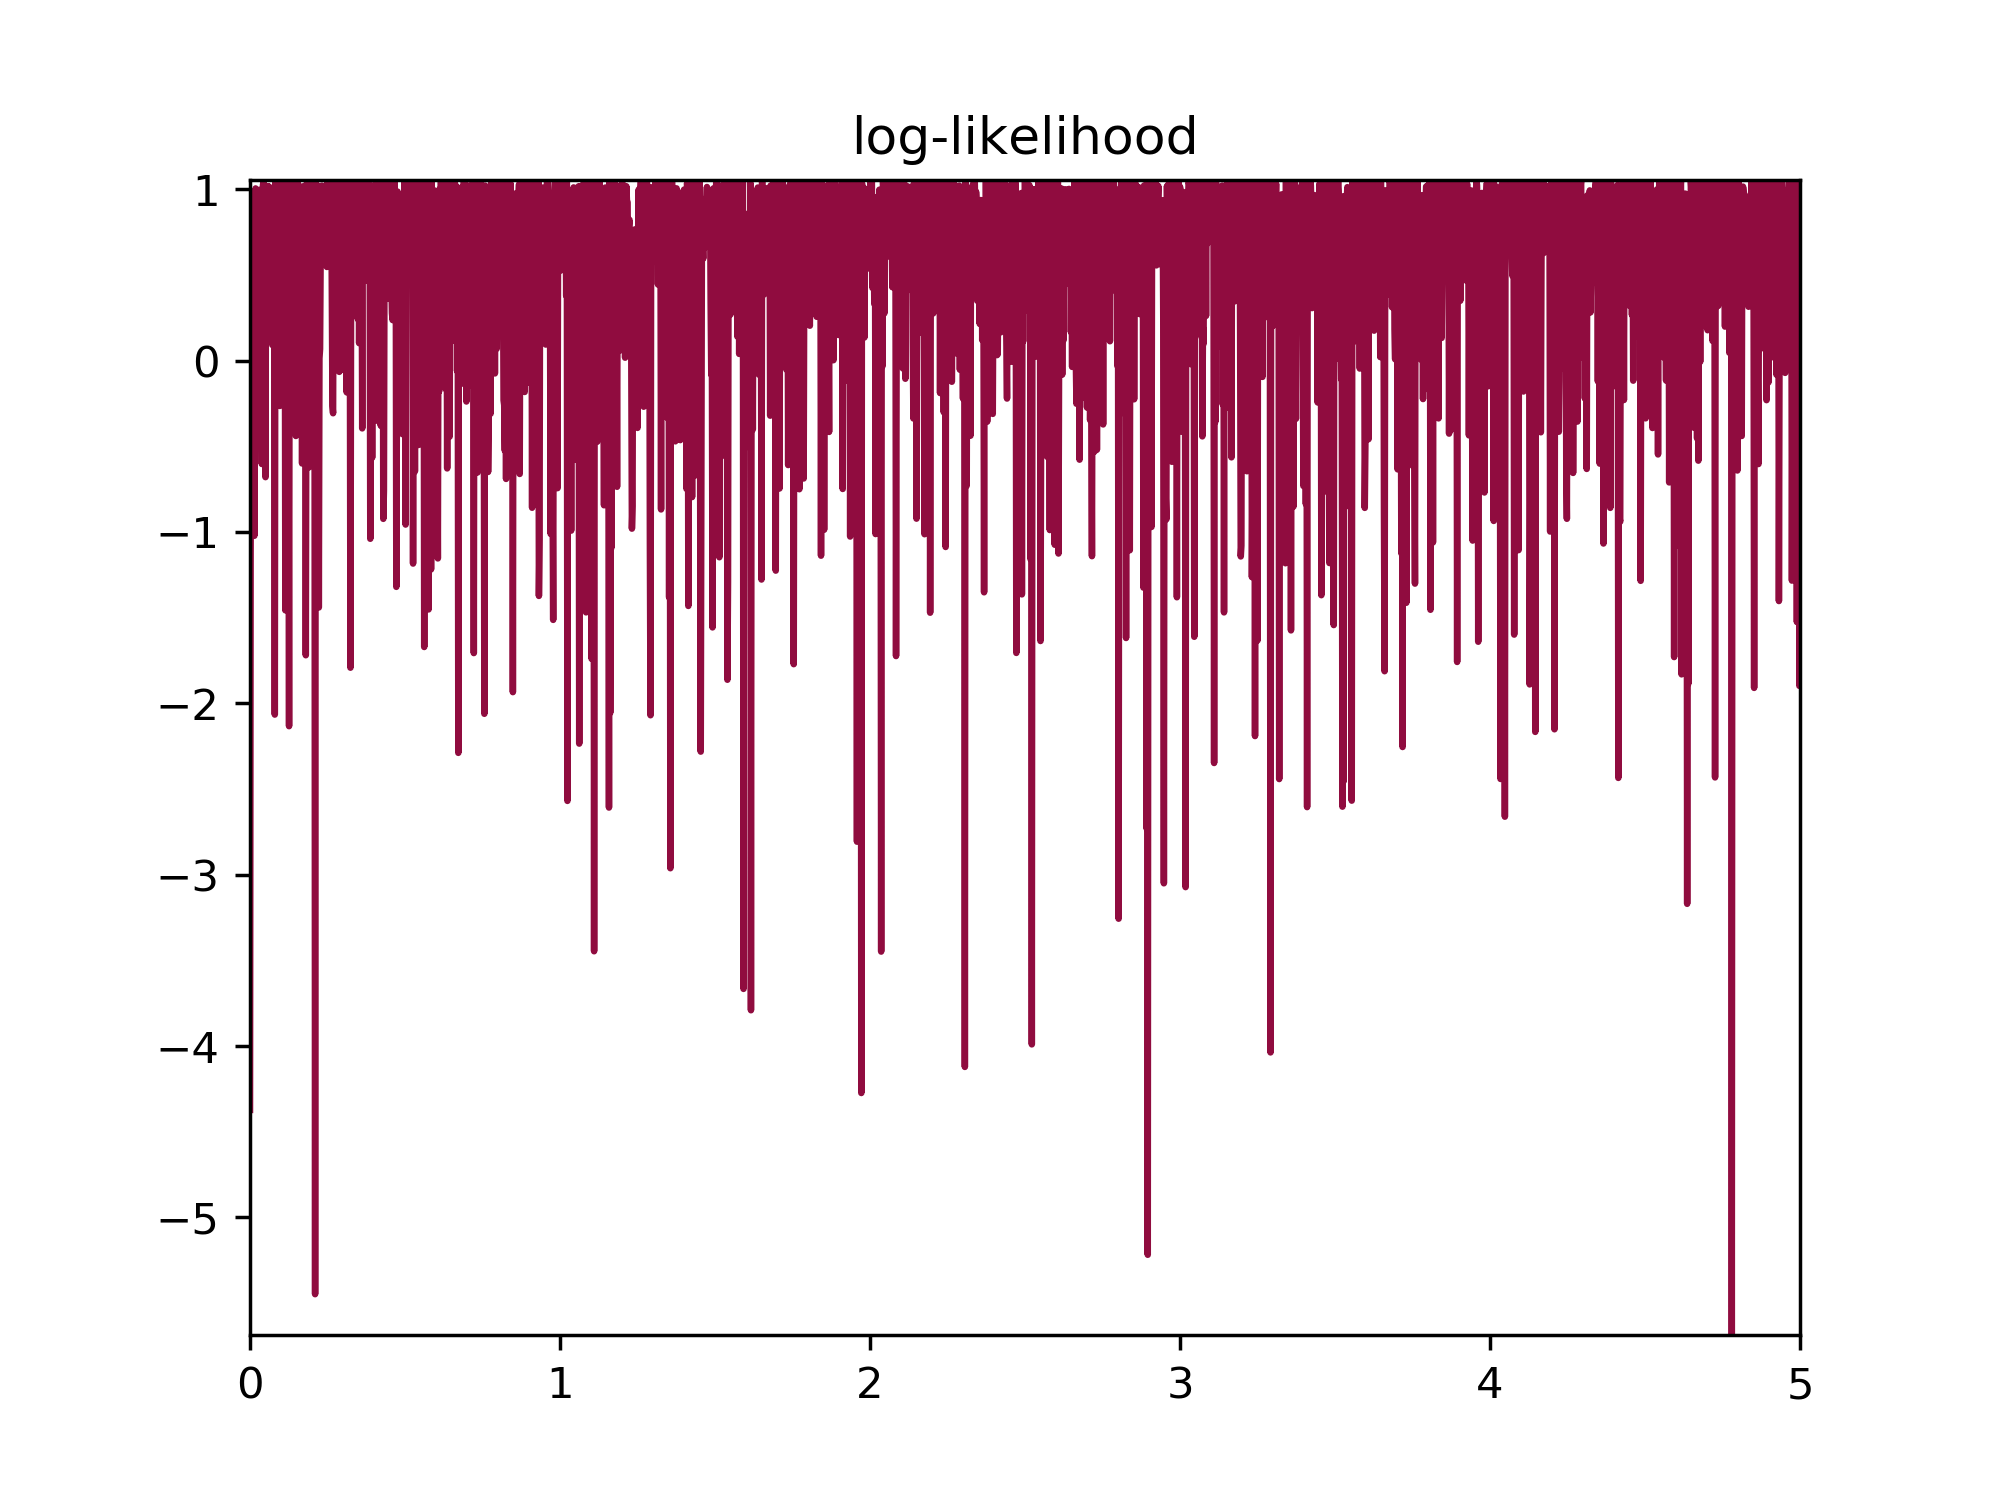

In [20]:
llp = visual.LogLikelihoodPlot(cumulative=False)
llp.process_run_df(run_df.df)

<IPython.core.display.Javascript object>


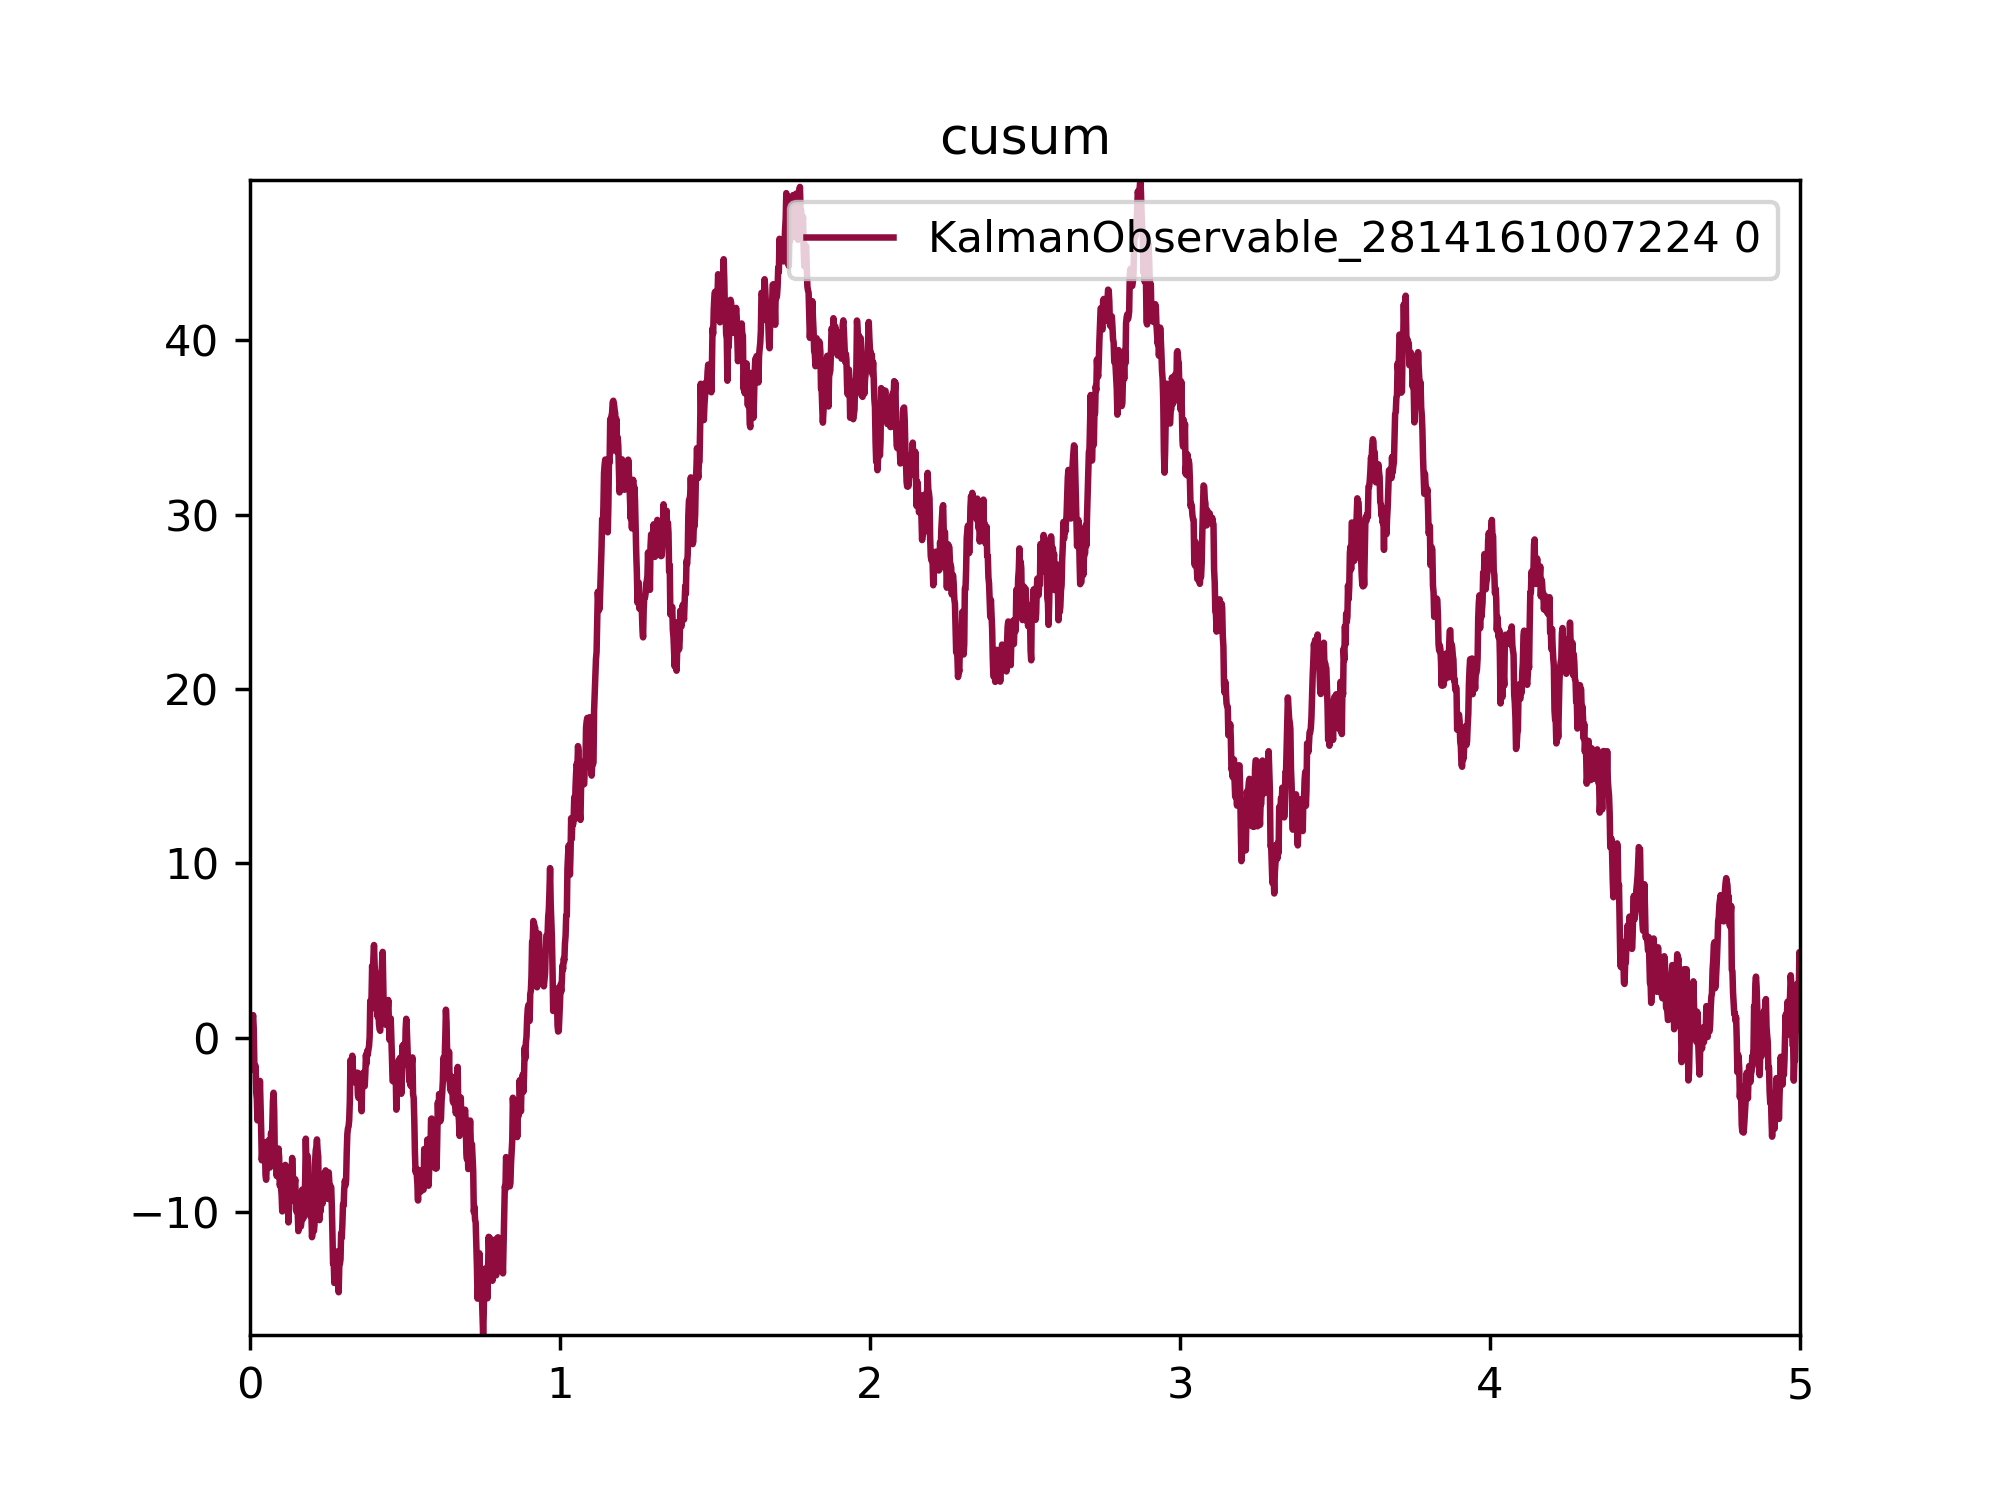

In [21]:
cp = visual.CUSUMPlot()
cp.process_run_df(run_df.df)

<IPython.core.display.Javascript object>


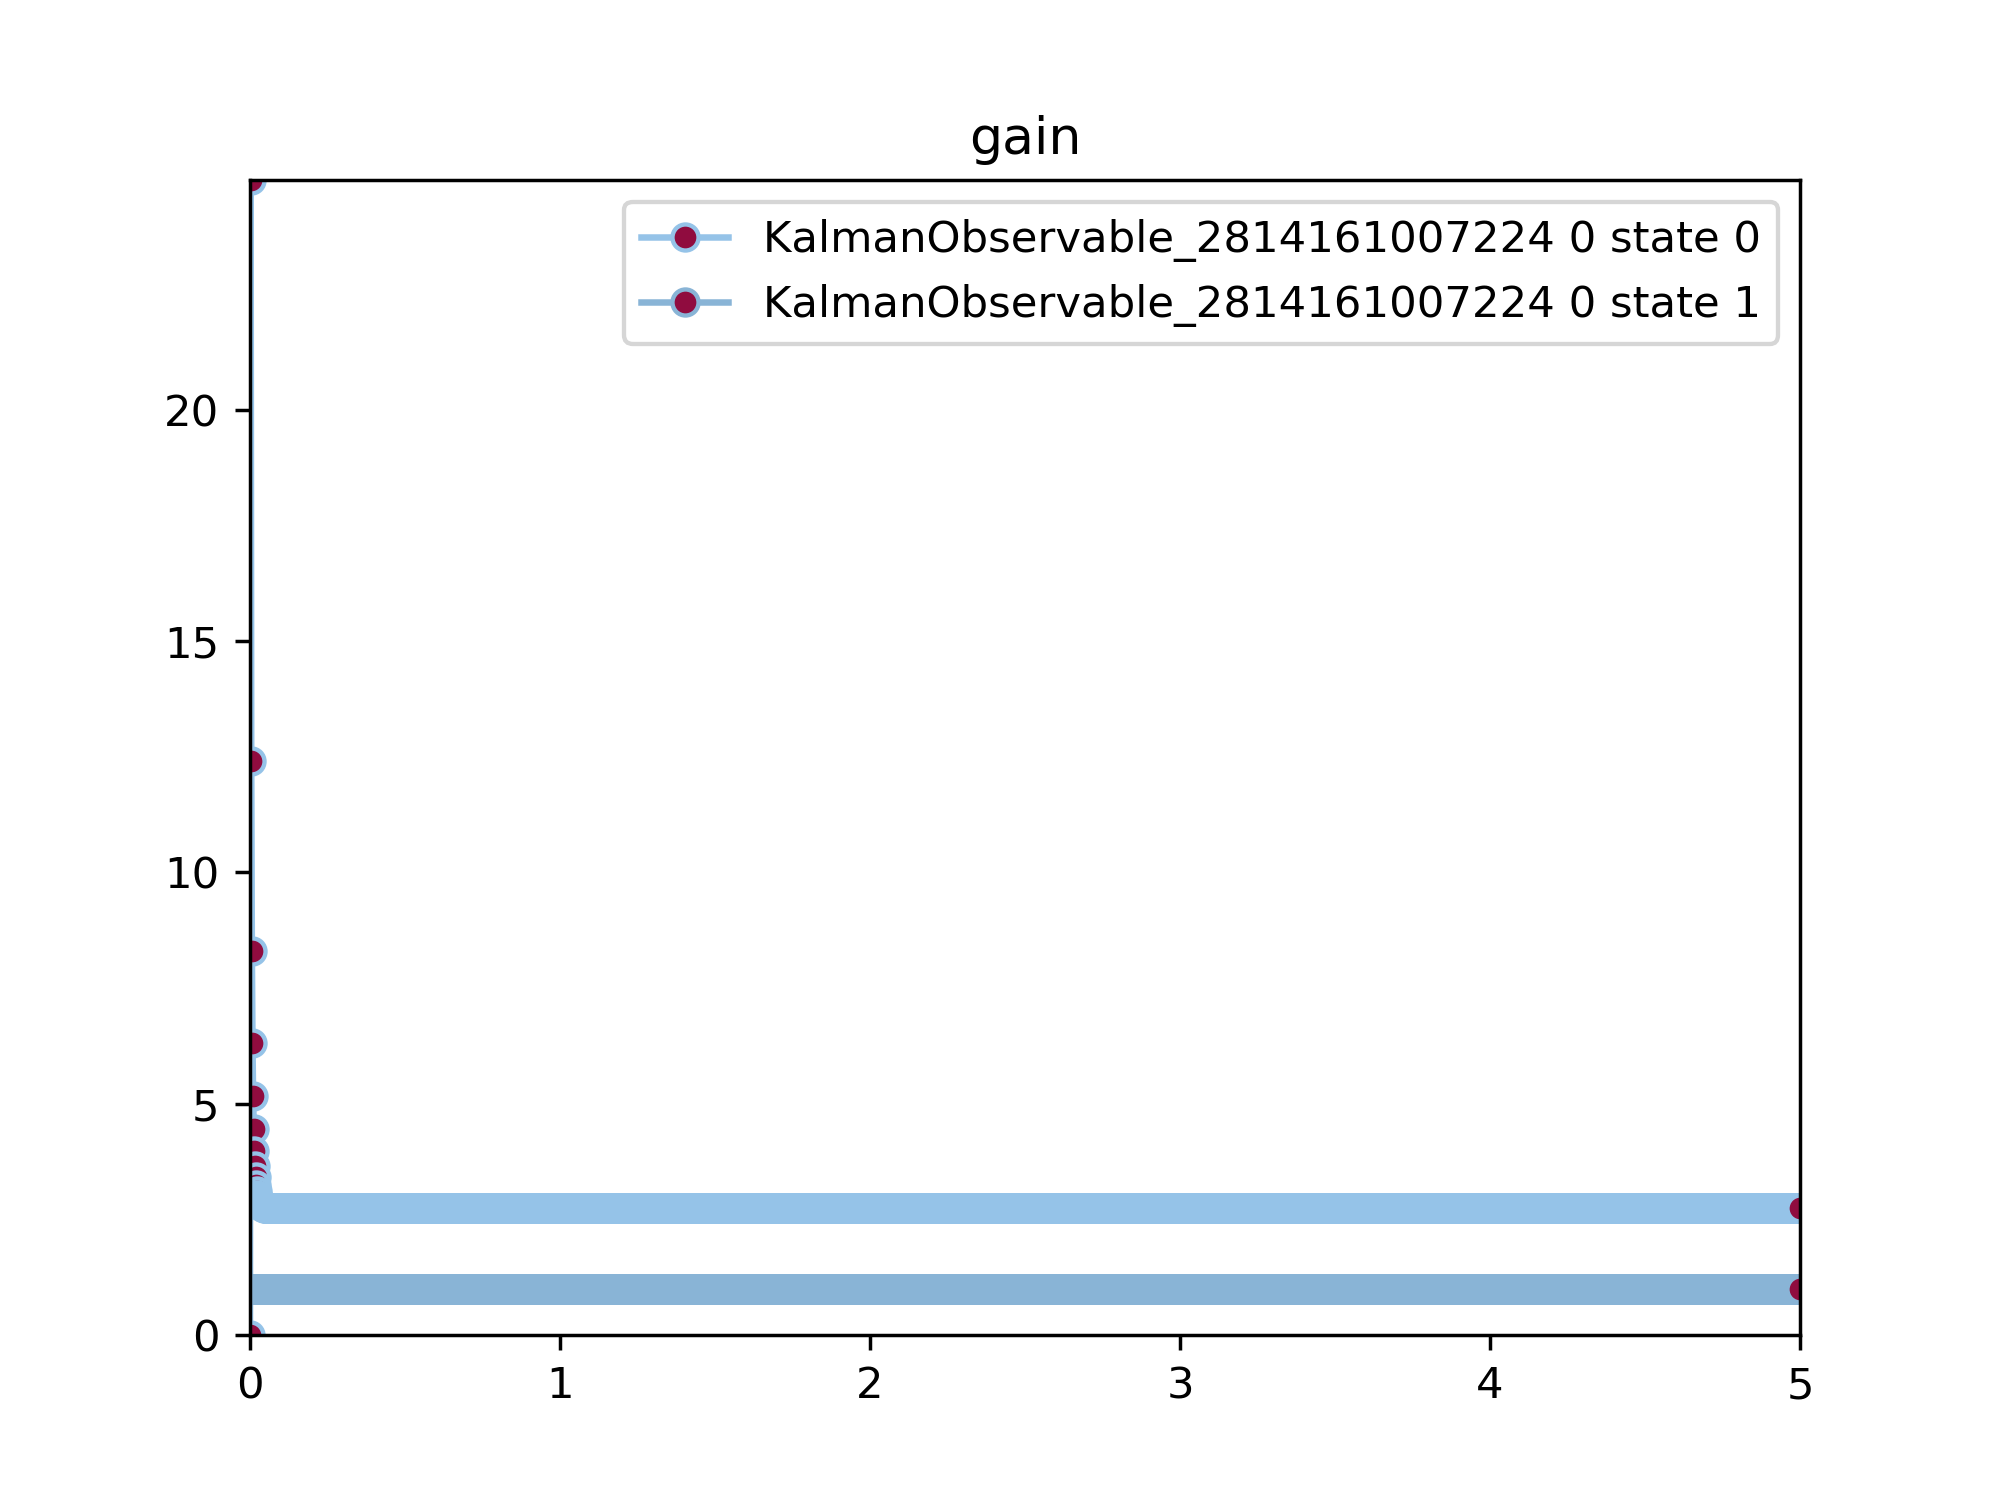

In [22]:
gp = visual.GainPlot(matrix_norm=False)
gp.process_run_df(run_df.df)

<IPython.core.display.Javascript object>


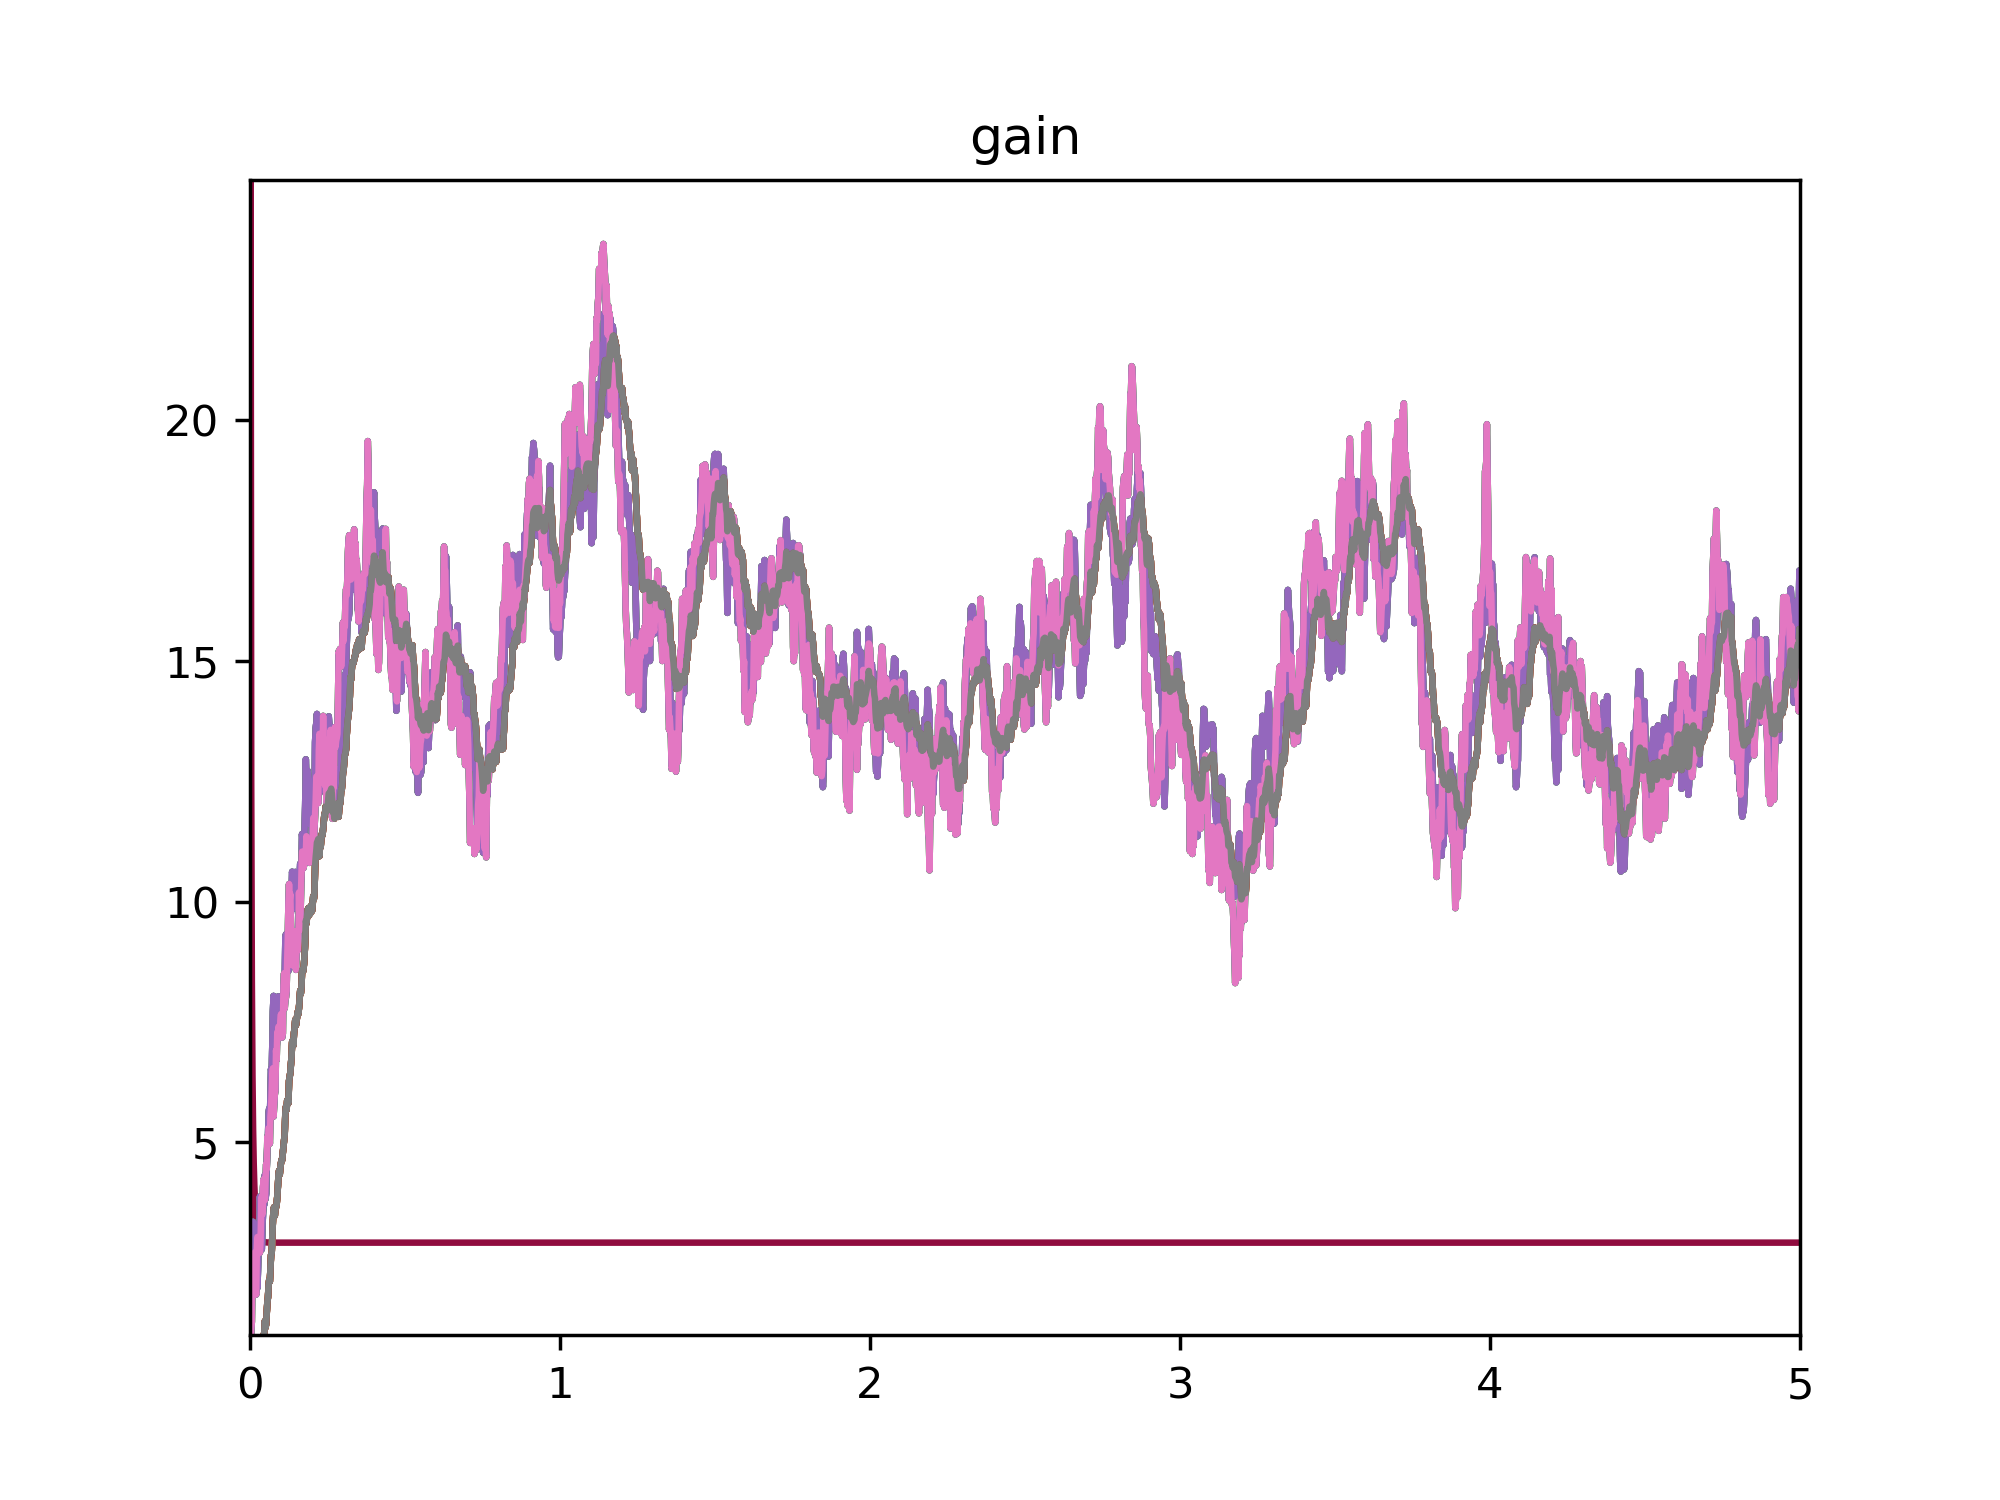

In [23]:
gp = visual.GainPlot(matrix_norm=True)
gp.process_run_df(run_df.df)

In [24]:
filtr = filtering.kalman.KalmanFilter(time=df.index[0], state_distr=N(mean=npu.col(0., 0.), cov=1000. * np.eye(2)), process=X)
state_observable = filtr.create_identity_observable(X)
first_observable = filtr.create_observable(kalman.KalmanFilterObsModel.create([[1., 0.]]), X)
last_observable = filtr.create_observable(kalman.KalmanFilterObsModel.create([[0., 1.]]), X)

In [25]:
ts, priors, posteriors, prior_values, posterior_values = [], [], [], [], []
for i, t in enumerate(df.index):
    ts.append(t)
    priors.append(state_observable.predict(t))
    prior_values.append(priors[-1].distr.mean.flatten())
    process_value = df.iloc[i].values
    last_observable.observe(N(process_value[-1], 0.), t)
    posteriors.append(state_observable.predict(t))
    posterior_values.append(posteriors[-1].distr.mean.flatten())
priors_df = pd.DataFrame(data=priors, index=ts)
posteriors_df = pd.DataFrame(data=posteriors, index=ts)
prior_values_df = pd.DataFrame(data=prior_values, index=ts)
posterior_values_df = pd.DataFrame(data=posterior_values, index=ts)

<IPython.core.display.Javascript object>


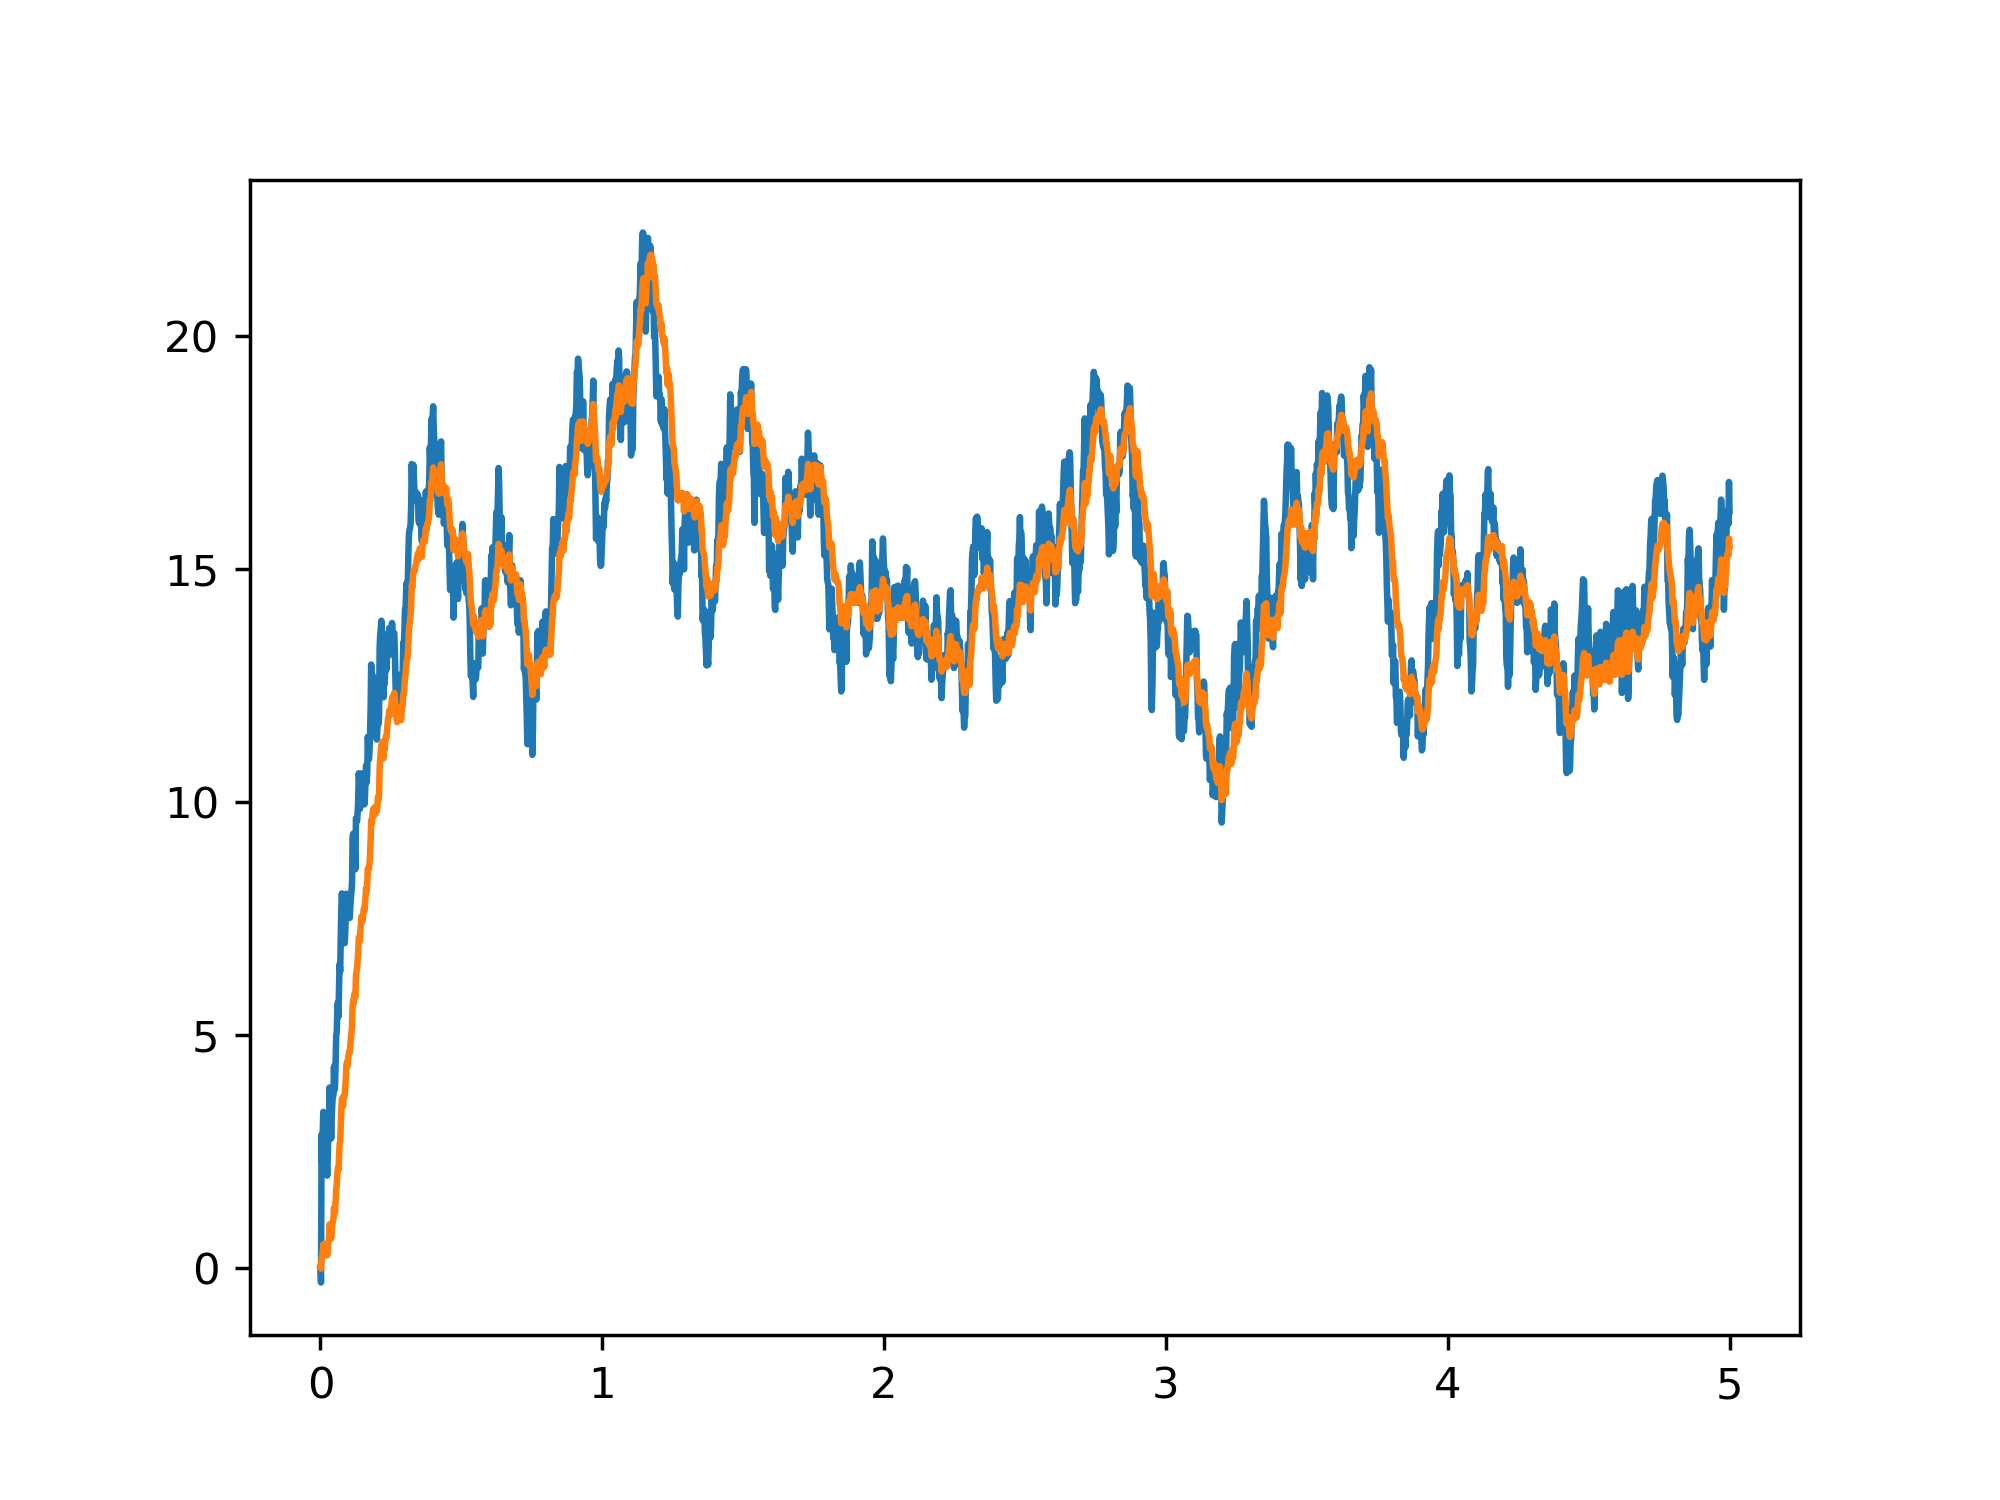

In [43]:
plt.figure()
plt.plot(posterior_values_df);

<IPython.core.display.Javascript object>


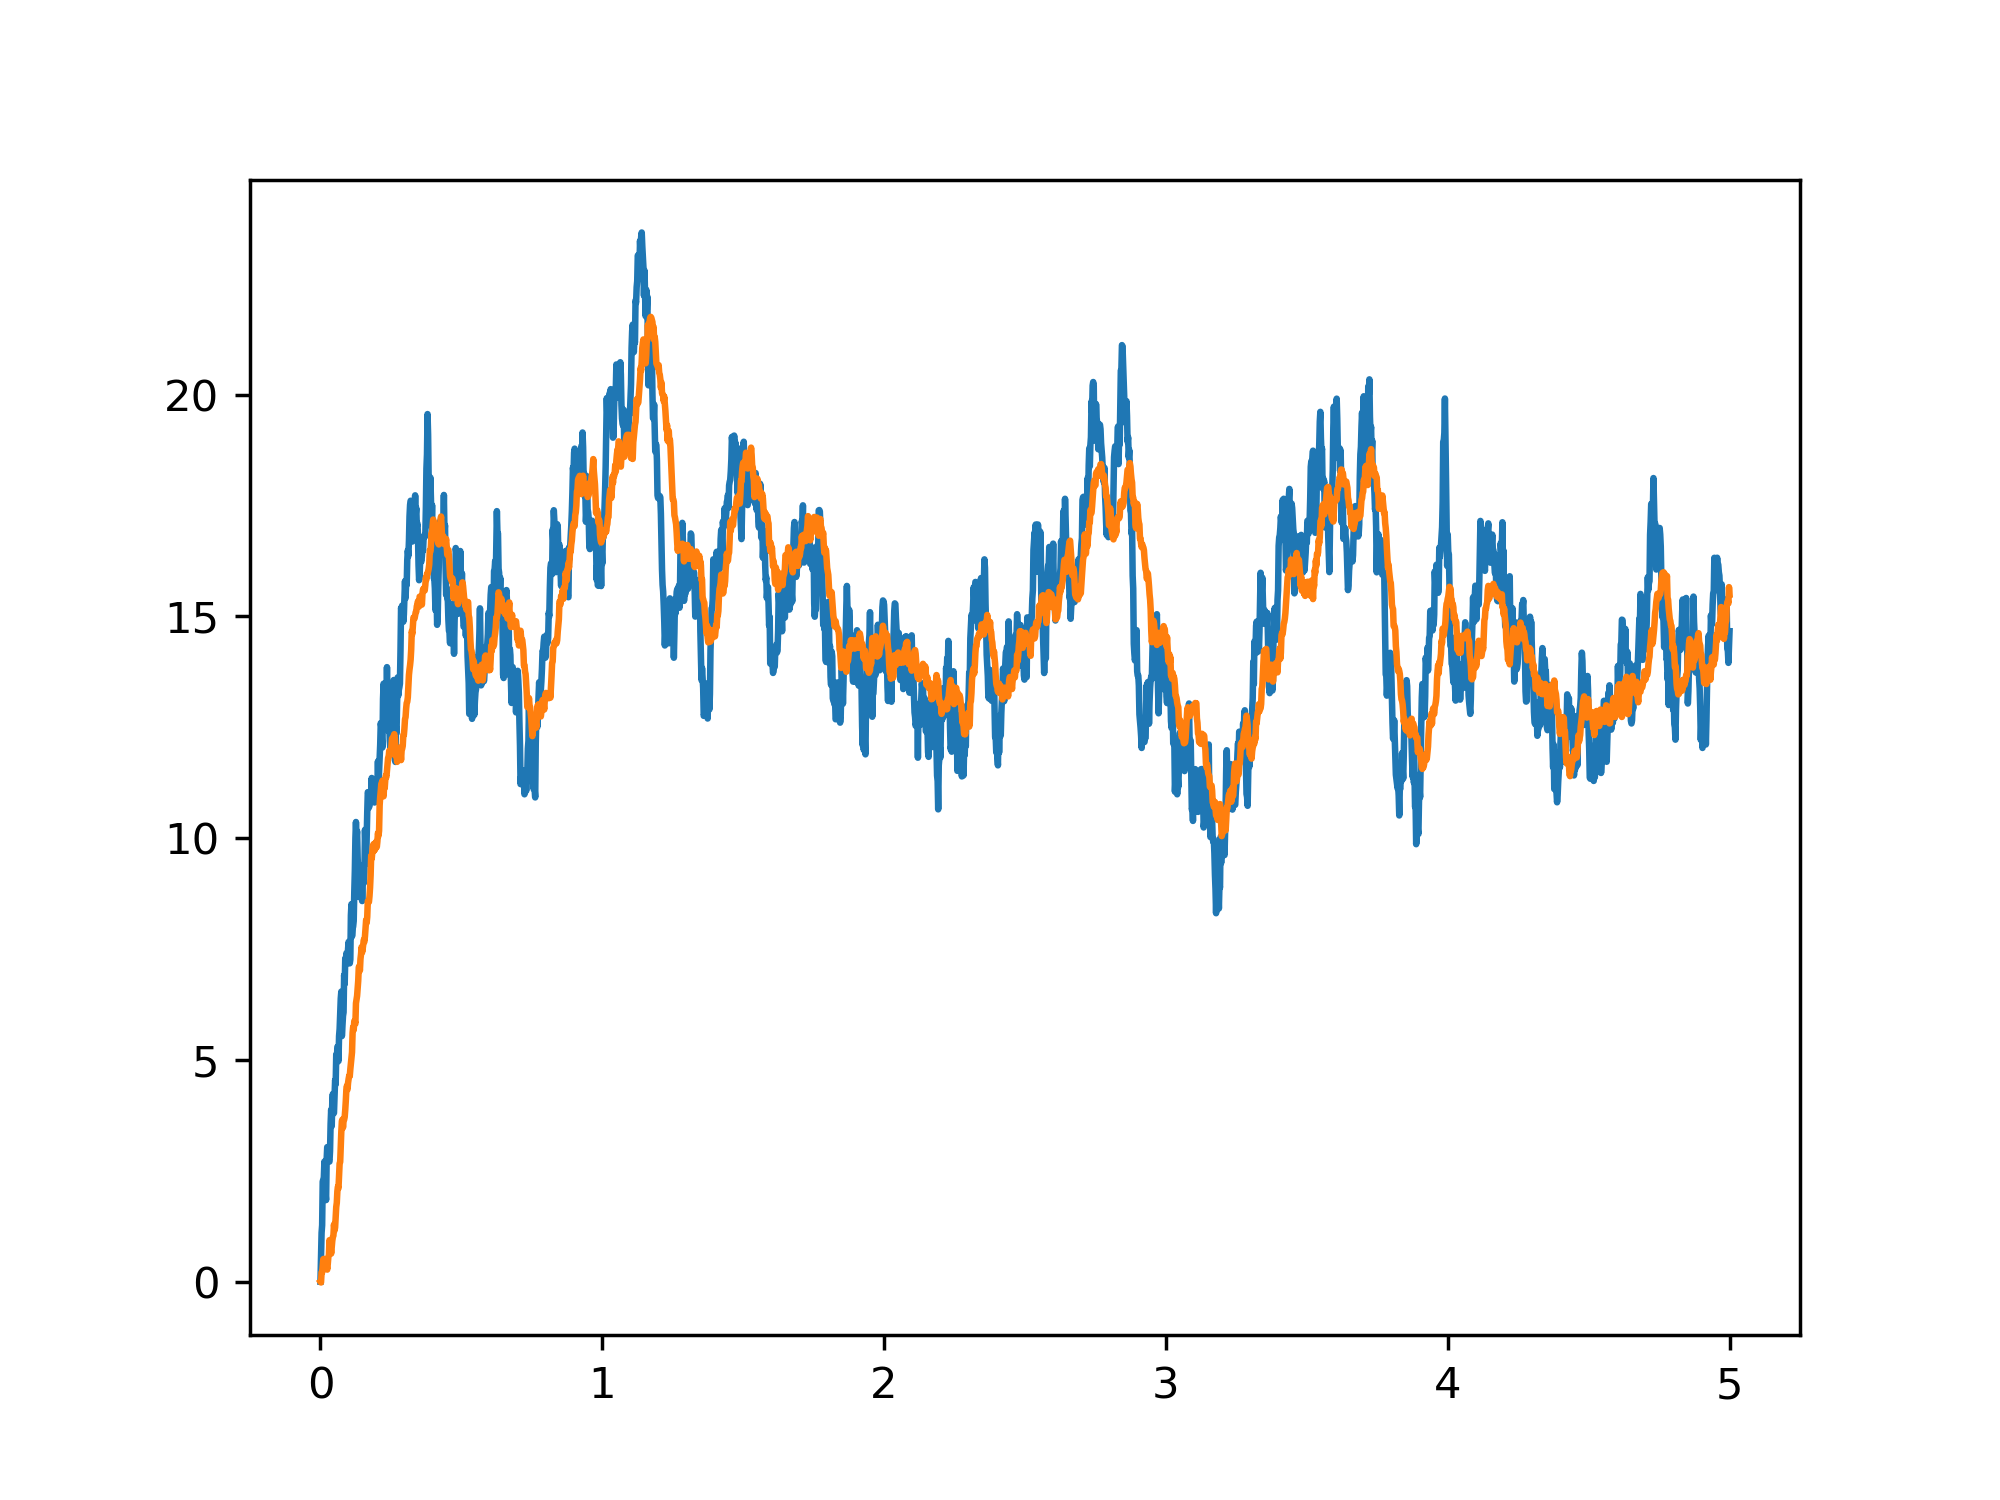

In [44]:
plt.figure()
plt.plot(df);

In [71]:
def filter_run(mu, sigma1, sigma2, theta1, theta2):
    X = proc.OrnsteinUhlenbeckProcess.create_multiscale_from_vol(transition_vector=[theta1, theta2], mean=mu, vol=[[sigma1, .0], [.0, sigma2]])
    filtr = filtering.kalman.KalmanFilter(time=df.index[0], state_distr=N(mean=npu.col(0., 0.), cov=1000. * np.eye(2)), process=X)
    state_observable = filtr.create_identity_observable(X)
    first_observable = filtr.create_observable(kalman.KalmanFilterObsModel.create([[1., 0.]]), X)
    last_observable = filtr.create_observable(kalman.KalmanFilterObsModel.create([[0., 1.]]), X)
    filter_run_result = filtering.run(observable=last_observable, obss=1, df=df)
    return npu.to_scalar(filter_run_result.cumulative_log_likelihood if filter_run_result.cumulative_log_likelihood is not None else np.nan)

In [72]:
filter_run(mu=20., sigma1=10., sigma2=3., theta1=20., theta2=20.)

1176.42387893944

In [73]:
param_ranges = col.OrderedDict((
        ('mu', np.linspace(0., 40., 5)),
        ('sigma1', np.linspace(1., 20., 5)),
        ('sigma2', np.linspace(1., 20., 5)),
        ('theta1', np.linspace(.1, 30., 5)),
        ('theta2', np.linspace(.1, 30., 5))))

In [74]:
result = optimisation.grid_search(
        filter_run, param_ranges,
        evaluator=evaluation.IPyParallelEvaluator(),
        optimisation_id='OU process calibration: Kalman filter maximum likelihood')

In [75]:
result.evaluation_statuses[10]

Status(ready=True, work=Work(work_id=11, func=<function filter_run at 0x0000028F3A8EED08>, args=[], kwargs=OrderedDict([('mu', 0.0), ('sigma1', 1.0), ('sigma2', 1.0), ('theta1', 15.049999999999999), ('theta2', 0.10000000000000001)]), call_count=1, repeat_count=1, info={'param_ranges': OrderedDict([('mu', array([  0.,  10.,  20.,  30.,  40.])), ('sigma1', array([  1.  ,   5.75,  10.5 ,  15.25,  20.  ])), ('sigma2', array([  1.  ,   5.75,  10.5 ,  15.25,  20.  ])), ('theta1', array([  0.1  ,   7.575,  15.05 ,  22.525,  30.   ])), ('theta2', array([  0.1  ,   7.575,  15.05 ,  22.525,  30.   ]))]), 'param_names': ['mu', 'sigma1', 'sigma2', 'theta1', 'theta2'], 'param_value_indices': [0, 0, 0, 2, 0], 'optimisation_id': 'OU process calibration: Kalman filter maximum likelihood', 'work_id': 11}), result=Result(work_id=11, func=<function filter_run at 0x0000028F4422B1E0>, args=[], kwargs=OrderedDict([('mu', 0.0), ('sigma1', 1.0), ('sigma2', 1.0), ('theta1', 15.049999999999999), ('theta2', 0.10

<IPython.core.display.Javascript object>


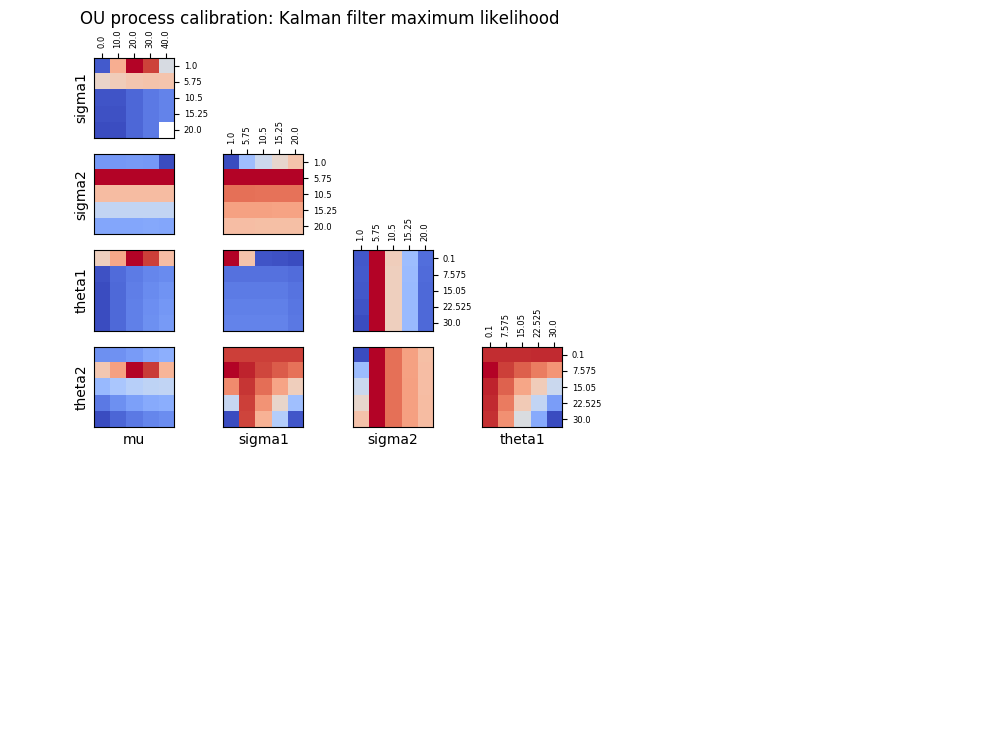

In [ ]:
optvisual.visualise_grid_search(result, refresh_until_ready=True, aggregate_func=np.nanmax, empty_aggregate=np.nan);